In [1]:
# Setup project root and import config
import sys
from pathlib import Path

# Define project root and append to sys.path
#PROJ_ROOT = Path(__file__).resolve().parents[1]
PROJ_ROOT = Path().resolve().parent
print(PROJ_ROOT)
sys.path.append(str(PROJ_ROOT))

# Now import config
from banknote_auth import config


/Users/peter/banknote-authentication-ml
PROJ_ROOT path is: /Users/peter/banknote-authentication-ml


In [2]:
# Load cleaned dataset
import pandas as pd

df = pd.read_csv(config.PROCESSED_DATA_DIR / "data_cleaned.csv")
df.head()


,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# Load trained model
import joblib

model = joblib.load(config.MODELS_DIR / "best_model.pkl")


## 📘 Project Outline: Banknote Authentication using Machine Learning

>*Click on any section to jump to that part of the notebook.*

1. [Import Required Libraries](#1.-Import-Required-Libraries)  
2. [Problem Statement](#2.-Problem-Statement)
3. [Project Structure](#3.-Project-Structure)  
4. [Dataset Overview](#4.-Dataset-Overview)  
5. [Exploratory Data Analysis (EDA)](#5.-Exploratory-Data-Analysis-(EDA))  
     5.1 [EDA Summary](#5.1-EDA-Summary)
6. [Feature Engineering](#6.-Feature-Engineering)  
     6.1 [Define Dependent and Independent Variables](#6.1-Define-Dependent-and-Independent-Variables)  
     6.2 [Data Preprocessing](#6.2-Data-Preprocessing)  
     6.3 [Train-Test Split](#6.3-Train-Test-Split)
7. [Model Training and Evaluation](#7.-Model-Training-and-Evaluation)  
     7.1 [Logistic Regression](#7.1-Logistic-Regression)  
     7.2 [K-Nearest Neighbors (KNN)](#7.2-K-Nearest-Neighbors-(KNN))  
     7.3 [Support Vector Machine (SVM)](#7.3-Support-Vector-Machine-(SVM))  
     7.4 [Decision Tree](#7.4-Decision-Tree)  
     7.5 [Random Forest](#7.5-Random-Forest)  
     7.6 [XGBoost](#7.6-XGBoost)
8. [Model Comparison and Evaluation](#8.-Model-Comparison-and-Evaluation)  
     8.1 [Performance Metrics](#8.1-Performance-Metrics)  
     8.2 [Overfitting Check](#8.2-Overfitting-Check)  
     8.3 [Visualize Model Scores](#8.3-Visualize-Model-Scores)  
     8.4 [Model Comparison Train and Test Accuracy](#8.4-Model-Comparison-Train-and-Test-Accuracy)
9. [Hyperparameter Tuning (Top Models)](#9.-Hyperparameter-Tuning-(Top-Models))  
     9.1 [GridSearchCV for SVM](#9.1-GridSearchCV-for-SVM)  
     9.2 [GridSearchCV for KNN](#9.2-GridSearchCV-for-KNN)  
     9.3 [GridSearchCV for Random Forest](#9.3-GridSearchCV-for-Random-Forest)  
     9.4 [GridSearchCV for XGBoost](#9.4-GridSearchCV-for-XGBoost)
10. [Ensemble Learning](#10.-Ensemble-Learning)  
     10.1 [VotingClassifier](#10.1-VotingClassifier)  
     10.2 [Evaluation of Ensemble Model](#10.2-Evaluation-of-Ensemble-Model)  
     10.3 [Confusion Matrix and ROC Curve](#10.3-Confusion-Matrix-and-ROC-Curve)
11. [Save trained Models](#11.-Save-Trained-Models)
    11.1 [Save Scaler](#11.1-Save-Scaler)
    11.2 [Load Saved Trained Model and Make Prediction](#11.2-Load-Saved-Trained-Model-and-Make-Prediction)
12. [Deployment (Optional)](#12.-Deployment-(Optional))  
13. [Conclusion](#13.-Conclusion)  
14. [Results](#14.-Results)
15. [References](#14.-References)  

## 1. Import Required Libraries

In [4]:
!pip install missingno

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import missingno as msno
from scipy import stats
from scipy.stats import sem
from scipy.stats import skew

plt.rcParams["figure.figsize"]=(8, 6)
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
from collections import Counter

## 2. Problem Statement

#### Banknote Authentication with Machine Learning: Financial Fraud Detection Through Image Analysis

This dataset addresses a critical challenge in financial security: automated detection of counterfeit banknotes. Comprising 1,372 analyzed samples derived from 400×400 pixel images of genuine and forged currency, it provides a clean, ready-to-use resource for binary classification with:

* No missing values
* Wavelet-transformed features (mathematically robust for texture analysis)
* Clear class labels (0 = genuine, 1 = forged)

Key Features Extracted via Wavelet Transform:

- Variance - Measures dispersion in transformed image texture

- Skewness - Quantifies asymmetry in pixel intensity distribution

- Curtosis - Detects unusual patterns in image sharpness

- Entropy - Assesses randomness in visual patterns

Learning Opportunities:

* Benchmark classification algorithms (Logistic Regression → XGBoost)
* Investigate feature importance for anti-counterfeiting systems
* Validate wavelet transforms for financial image processing
* Develop deployable fraud detection models

#### Business Impact:

* ATM/Cash-Handling Integration: Potential deployment in ATMs, vending machines, and bank counters to block counterfeit notes in real time.

* Cost Reduction: Minimizes losses from fraud while reducing manual verification overhead.


Source: UCI Machine Learning Repository (Donor: Helene Dörksen, University of Applied Sciences, Ostwestfalen-Lippe).

Dataset link:https://www.kaggle.com/datasets/shantanuss/banknote-authentication-uci?resource=download

## 3. Project Structure

```
├── LICENSE            <- Open-source license if one is chosen
├── Makefile           <- Makefile with convenience commands like `make data` or `make train`
├── README.md          <- The top-level README for developers using this project.
├── data
│   ├── external       <- Data from third party sources.
│   ├── interim        <- Intermediate data that has been transformed.
│   ├── processed      <- The final, canonical data sets for modeling.
│   └── raw            <- The original, immutable data dump.
│
├── docs               <- A default mkdocs project; see www.mkdocs.org for details
│
├── models             <- Trained and serialized models, model predictions, or model summaries
│
├── notebooks          <- Jupyter notebooks. Naming convention is a number (for ordering),
│                         the creator's initials, and a short `-` delimited description, e.g.
│                         `1.0-jqp-initial-data-exploration`.
│
├── pyproject.toml     <- Project configuration file with package metadata for 
│                         banknote_auth and configuration for tools like black
│
├── references         <- Data dictionaries, manuals, and all other explanatory materials.
│
├── reports            <- Generated analysis as HTML, PDF, LaTeX, etc.
│   └── figures        <- Generated graphics and figures to be used in reporting
│
├── requirements.txt   <- The requirements file for reproducing the analysis environment, e.g.
│                         generated with `pip freeze > requirements.txt`
│
├── setup.cfg          <- Configuration file for flake8
│
└── banknote_auth   <- Source code for use in this project.
    │
    ├── __init__.py             <- Makes banknote_auth a Python module
    │
    ├── config.py               <- Store useful variables and configuration
    │
    ├── dataset.py              <- Scripts to download or generate data
    │
    ├── features.py             <- Code to create features for modeling
    │
    ├── modeling                
    │   ├── __init__.py 
    │   ├── predict.py          <- Code to run model inference with trained models          
    │   └── train.py            <- Code to train models
    │
    └── plots.py                <- Code to create visualizations
```

## 4. Dataset Overview

In [46]:
# Load the dataset
# Read the .txt file
data = pd.read_csv("/Users/peter/banknote-authentication-ml/data/raw/data_banknote_authentication.txt", header=None)

# Add column names
data.columns = ["variance", "skewness", "curtosis", "entropy", "class"]
data.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [47]:
# Shape of the data
data.shape

(1372, 5)

Showing the duplicated values

In [48]:
# Check number of duplicated rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")


Number of duplicated rows: 24


In [49]:
# Drop Duplicated values
data = data.drop_duplicates()

print(f"Shape after dropping duplicates: {data.shape}")


Shape after dropping duplicates: (1348, 5)


In [50]:
# Rename the columns
data = data.rename(columns={'variance':'Variance_Wavelet','skewness':'Skewness_Wavelet','curtosis':'Curtosis_Wavelet', 
                            'entropy':'Image_Entropy' ,'class':'Class'}, inplace = False)

In [51]:
# Display the cleaned DataFrame
data.head(10)

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [52]:
# Check missing value
data.isnull().sum()

Variance_Wavelet    0
Skewness_Wavelet    0
Curtosis_Wavelet    0
Image_Entropy       0
Class               0
dtype: int64

## 5. Exploratory Data Analysis (EDA)

In [53]:
# View the names of variable in the data 
data.columns

Index(['Variance_Wavelet', 'Skewness_Wavelet', 'Curtosis_Wavelet',
       'Image_Entropy', 'Class'],
      dtype='object')

In [54]:
# To check the names of data type and non-null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1348 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1348 non-null   float64
 1   Skewness_Wavelet  1348 non-null   float64
 2   Curtosis_Wavelet  1348 non-null   float64
 3   Image_Entropy     1348 non-null   float64
 4   Class             1348 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.2 KB


In [55]:
# Check the descriptive satistics of the data.
# The summary of each numerical attribute.
data.describe()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [56]:
# Class Verification
print("="*50)
print("Class Verification")
print("="*50)
print(f"Total samples: {len(data)}")
print(f"Number of classes: {data['Class'].nunique()}")
print("\nClass labels:", data['Class'].unique())


Class Verification
Total samples: 1348
Number of classes: 2

Class labels: [0 1]


In [57]:
# Class Distribution - Numerical
class_dist = data['Class'].value_counts().reset_index()
class_dist.columns = ['Class', 'Count']
class_dist['Percentage'] = (class_dist['Count'] / len(data)) * 100
print("\n" + "="*50)
print("Class Distribution")
print("="*50)
print(class_dist.to_string(index=False))


Class Distribution
 Class  Count  Percentage
     0    738   54.747774
     1    610   45.252226


##### Both the classes have nearly equal count, hence the dataset has good balance

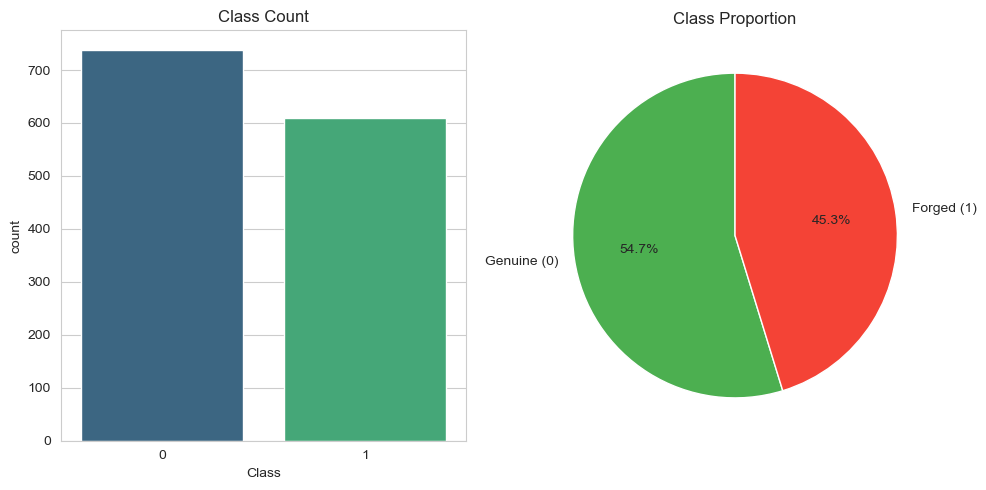

In [58]:
# Class Distribution - Visual
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Class', data=data, palette='viridis')
plt.title('Class Count')

plt.subplot(1, 2, 2)
plt.pie(class_dist['Count'], 
        labels=['Genuine (0)', 'Forged (1)'],
        autopct='%1.1f%%',
        colors=['#4CAF50', '#F44336'],
        startangle=90)
plt.title('Class Proportion')
plt.tight_layout()
plt.show();


In [59]:
# Balance Check: To check if the dataset is balance or imbalance
imbalance_ratio = class_dist['Count'].max() / class_dist['Count'].min()
print("\n" + "="*50)
print("Balance Check")
print("="*50)
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")
print("Interpretation:")
print("- Ratio close to 1:1 indicates balanced data")
print(f"- Your data is {'balanced' if imbalance_ratio < 1.5 else 'moderately imbalanced'}")



Balance Check
Imbalance ratio: 1.21:1
Interpretation:
- Ratio close to 1:1 indicates balanced data
- Your data is balanced


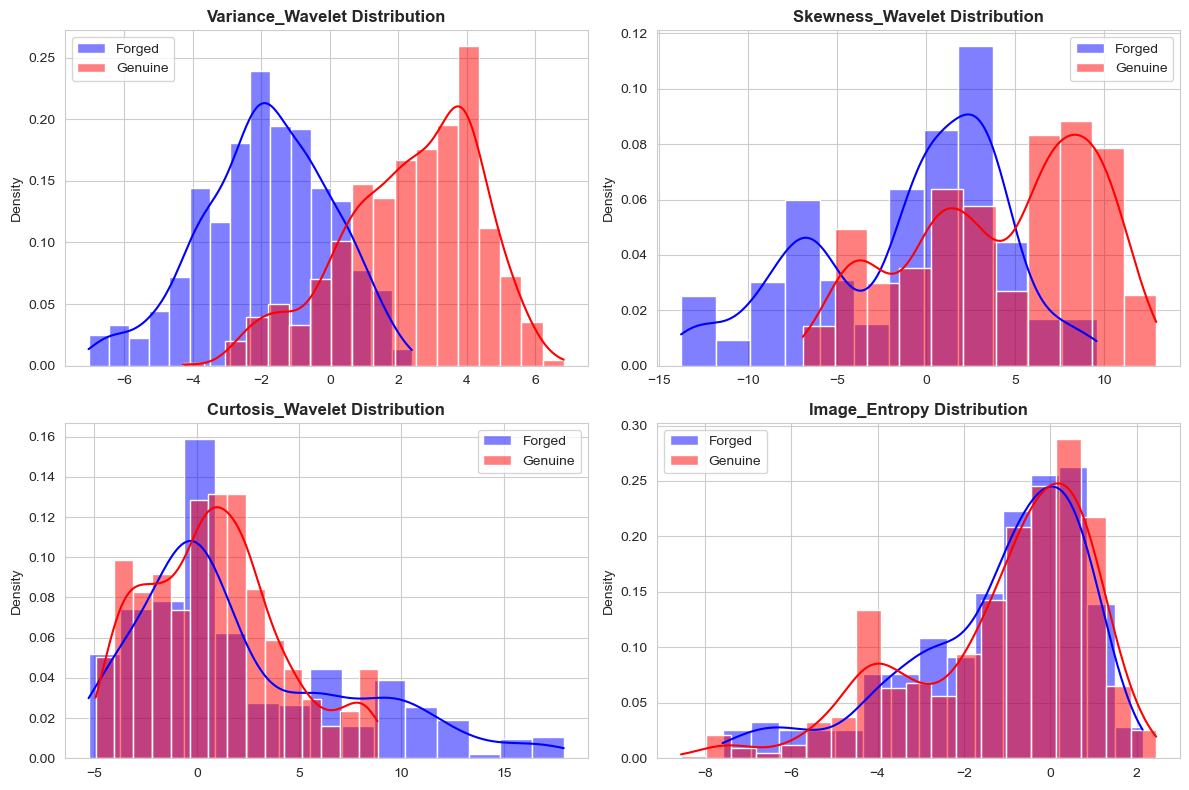

In [60]:
# let's plot the histogram to show a label that has class (0 = genuine, 1 = forged)
plt.figure(figsize=(12, 8))
features = data.columns[:-1]  # Exclude 'Class' column

for i, label in enumerate(features):
    plt.subplot(2, 2, i+1)
    
    # Plot histograms with KDE
    sns.histplot(data=data[data["Class"]==1], x=label, color="blue", 
                 label="Forged", kde=True, stat="density", alpha=0.5)
    sns.histplot(data=data[data["Class"]==0], x=label, color="red", 
                 label="Genuine", kde=True, stat="density", alpha=0.5)
    
    plt.title(f"{label} Distribution", fontweight='bold')
    plt.ylabel("Density")
    plt.xlabel("")
    plt.legend()
    
plt.tight_layout()
plt.show();

### Key Findings by Feature
1. Variance

Clear Separation:

* Genuine notes cluster around higher values (2-6)

* Forged notes dominate lower ranges (-7 to 2)

* Implication: Most discriminative feature for classification

2. Skewness

Bimodal Distribution:

* Genuine: Peaks at ~8 (right-skewed) and ~-4 (left-skewed)

* Forged: Concentrated near 0 with long tails

Insight: Genuine notes show asymmetric printing patterns

3. Curtosis

Opposite Trends:

* Genuine: Negative values (peaked distributions)

* Forged: Positive values (flatter distributions)

Significance: Measures sharpness differences in texture

4. Entropy

Overlap Area:

* Both classes span -8 to 2 range

* Genuine notes show tighter clustering

Caution: Least discriminative single feature



#### Pairplots to visualize feature relationships

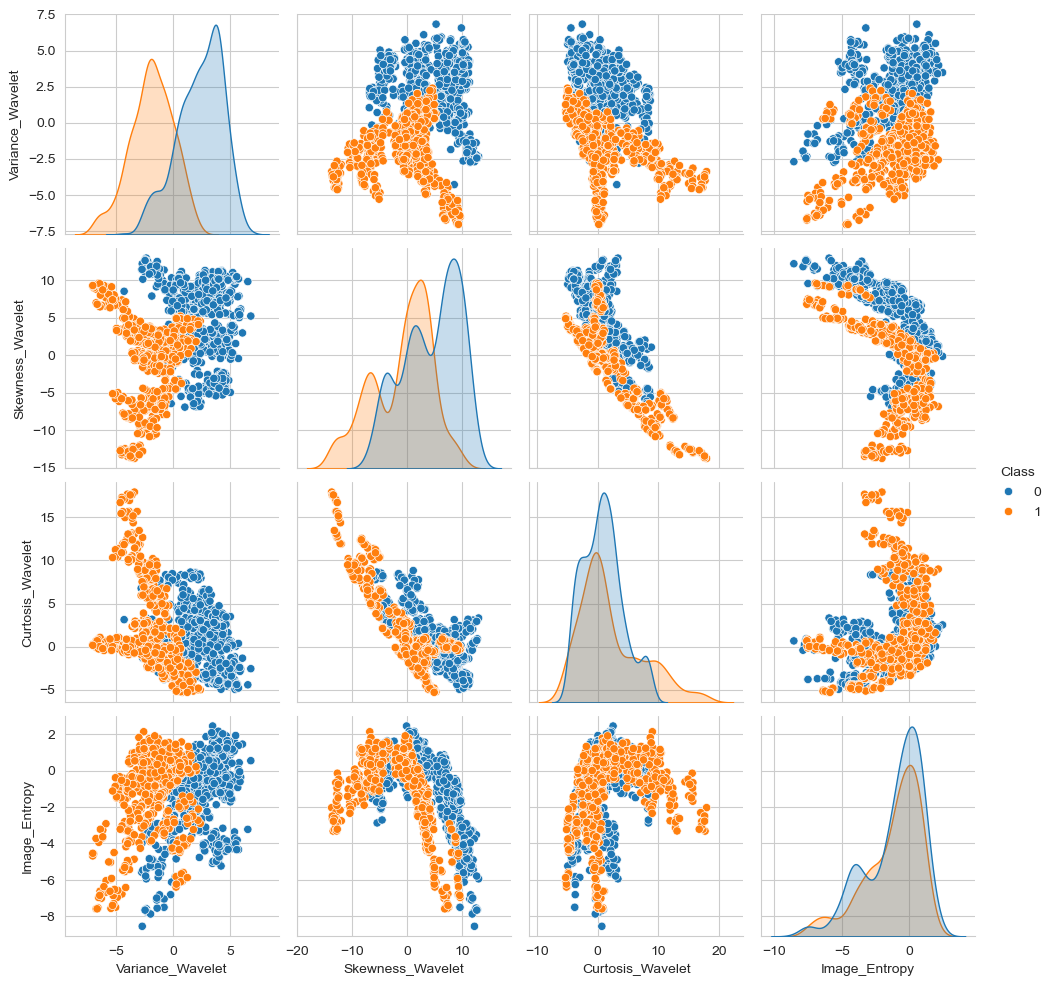

In [61]:
# Create pairplots to visualize feature relationships

## Let's plot pairwise plot
sns.pairplot(data, hue="Class");
plt.show();

sns.pairplot(df, hue = "Class") generates a pair plot of the variables in the DataFrame data, where data points are colored based on the categories in the "Class" variable. 
This can be helpful for visualizing relationships between variables and identifying patterns or clusters within the data.

### Using Interquantilke Range (IQR) to Detect and Remove Outlier

In [62]:
# # Define a function to detect outliers using IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Apply the function to each numerical column in the DataFrame
outliers_iqr = data.select_dtypes(include=['number']).apply(detect_outliers_iqr)

# Summarize the results
print("Outliers detected using IQR:")

print(outliers_iqr.sum())

Outliers detected using IQR:
Variance_Wavelet     0
Skewness_Wavelet     0
Curtosis_Wavelet    59
Image_Entropy       32
Class                0
dtype: int64


In [63]:
# Calculate outliers using IQR method 2
for feature in ['Variance_Wavelet', 'Skewness_Wavelet', 'Curtosis_Wavelet', 'Image_Entropy']:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    outliers = data[(data[feature] < lower) | (data[feature] > upper)]
    print(f"\n{feature}: {len(outliers)} outliers")
    print(outliers['Class'].value_counts())


Variance_Wavelet: 0 outliers
Series([], Name: count, dtype: int64)

Skewness_Wavelet: 0 outliers
Series([], Name: count, dtype: int64)

Curtosis_Wavelet: 59 outliers
Class
1    59
Name: count, dtype: int64

Image_Entropy: 32 outliers
Class
1    17
0    15
Name: count, dtype: int64


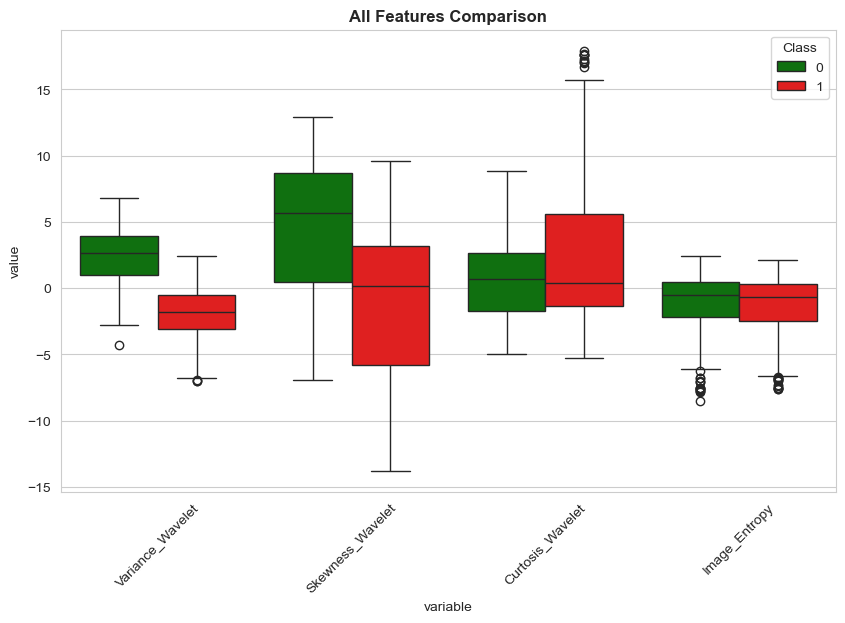

In [64]:
## Let visualize it using Boxplot
import pandas as pd
import matplotlib.pyplot as plt

# Identify outliers in all features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.melt(id_vars='Class'), 
            x='variable', y='value', hue='Class',
            palette={0: 'green', 1: 'red'})
plt.xticks(rotation=45)
plt.title('All Features Comparison', fontweight='bold')
plt.show()

### Remove Outliers Using IQR Method

In [65]:
# Define original size
original_size = len(data)

# Define features to apply IQR to
features = data.select_dtypes(include='number').columns  # or manually specify list

# Function to remove outliers using IQR
def remove_outliers_iqr(data, feature_columns, factor=1.0):
    data_clean = data.copy()
    for col in feature_columns:
        Q1 = data_clean[col].quantile(0.25)
        Q3 = data_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        data_clean = data_clean[(data_clean[col] >= lower_bound) & (data_clean[col] <= upper_bound)]
    return data_clean

# Apply function
data_no_outliers = remove_outliers_iqr(data, features, factor=1.0)

# Report results
print(f"Removed {original_size - len(data_no_outliers)} outliers ({(original_size - len(data_no_outliers))/original_size:.1%})")
print(f"New dataset size: {len(data_no_outliers)} samples")


Removed 218 outliers (16.2%)
New dataset size: 1130 samples


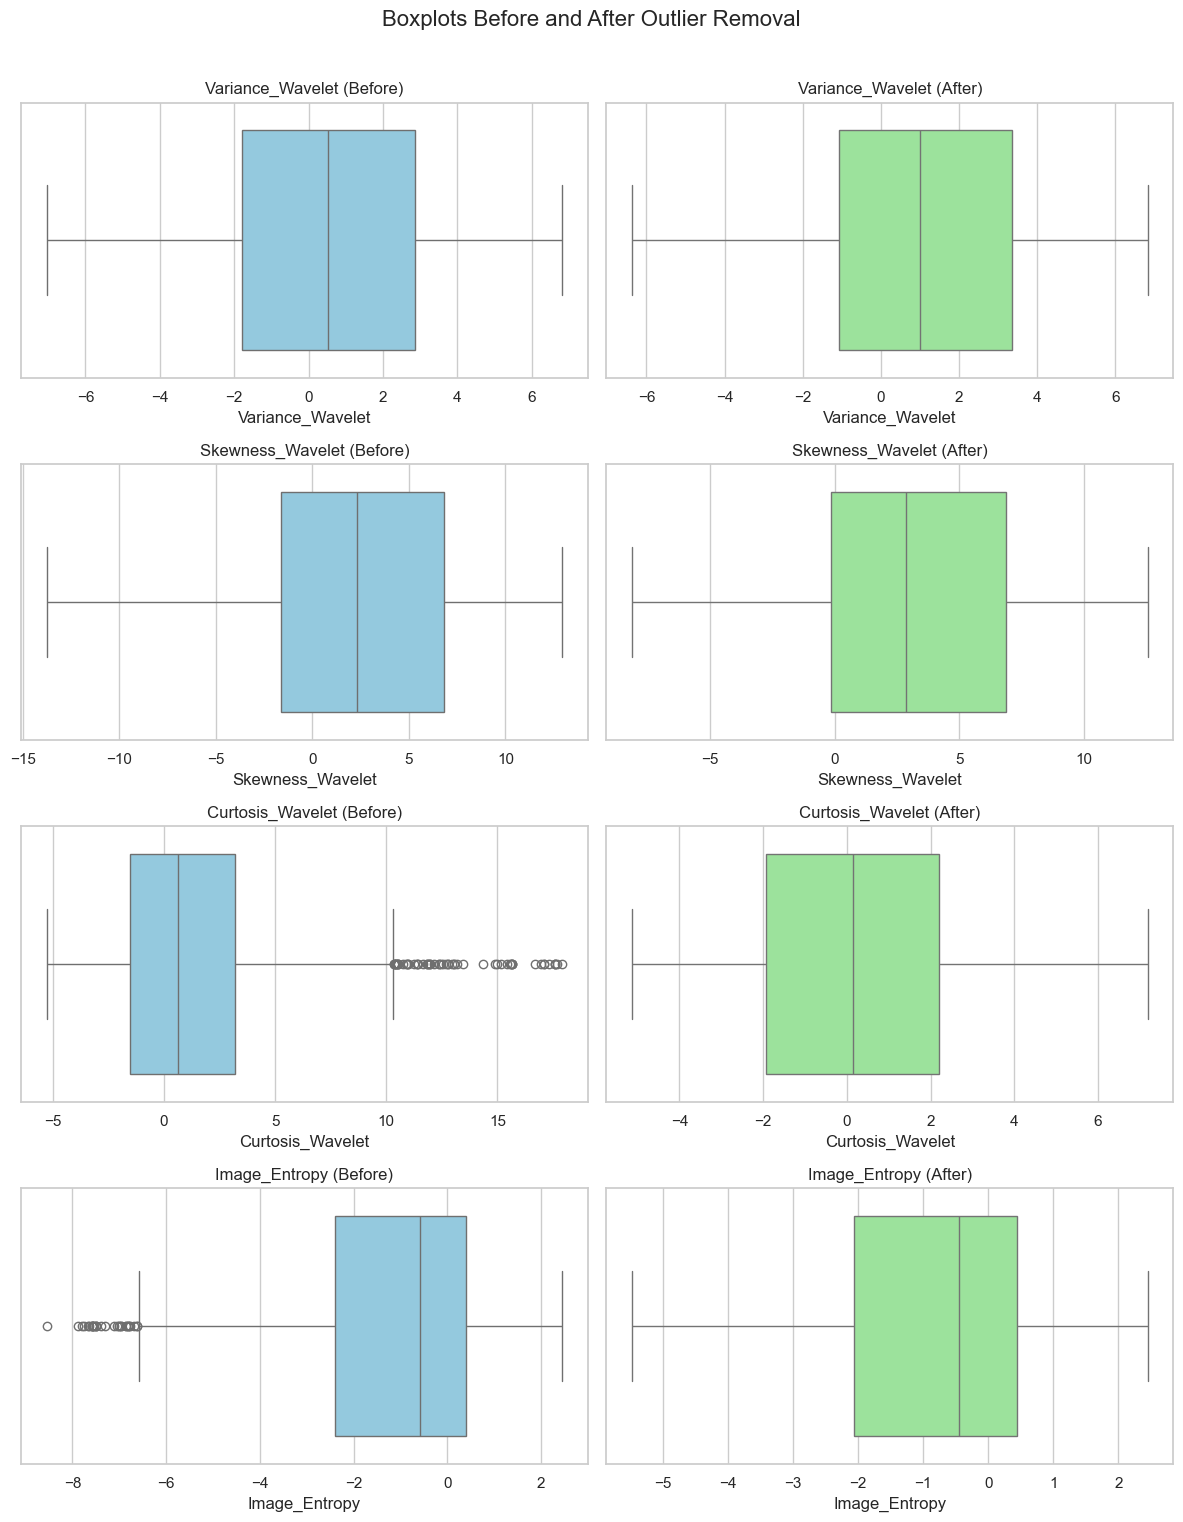

In [66]:
# Visual Verification (Before & After)
# Set style
sns.set(style="whitegrid")
features = ['Variance_Wavelet', 'Skewness_Wavelet', 'Curtosis_Wavelet', 'Image_Entropy']

# Plot boxplots side by side
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
fig.suptitle('Boxplots Before and After Outlier Removal', fontsize=16)

for i, col in enumerate(features):
    sns.boxplot(data=data, x=col, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f"{col} (Before)")
    
    sns.boxplot(data=data_no_outliers, x=col, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f"{col} (After)")

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show();


In [67]:
# Check if there are still an outlier

# Define a function to detect outliers using IQR
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Apply the function to each numerical column in the DataFrame
outliers_iqr = data_no_outliers.select_dtypes(include=['number']).apply(detect_outliers_iqr)

# Summarize the results
print("Outliers detected using IQR:")

print(outliers_iqr.sum())

Outliers detected using IQR:
Variance_Wavelet    0
Skewness_Wavelet    0
Curtosis_Wavelet    0
Image_Entropy       0
Class               0
dtype: int64


In [68]:
# Checking the original shape $ shape after removing an outliers
print(f"Original shape: {data.shape}")
print(f"Data shape after removed outliers: {data_no_outliers.shape}")

Original shape: (1348, 5)
Data shape after removed outliers: (1130, 5)


In [69]:
# Renaming my data_no_outliers
data_cleaned = data_no_outliers

In [70]:
data_cleaned.shape

(1130, 5)

### Save the cleaned data to CSV

In [72]:
import os

# Ensure the processed data directory exists
os.makedirs("data/processed", exist_ok=True)

# Save cleaned data to the correct path
data_cleaned.to_csv("data/processed/data_cleaned.csv", index=False, sep='\t')

print("data_cleaned.csv saved successfully!")

data_cleaned.csv saved successfully!


### Use this data_cleaned.csv output for data/processed/data_cleaned.csv on cookiecutter

In [73]:
# Use this data_cleaned.csv output for data/processed/data_cleaned.csv on cookiecutter

#import pandas as pd
#import sys

# Load the cleaned data
#df = pd.read_csv("data/processed/data_cleaned.csv")

# Print as CSV to output (without the index)
#df.to_csv(sys.stdout, index=False)

In [74]:
# Check if the CSV file exists and print its size
csv_path = "data/data_cleaned.csv"
print("CSV exists:", os.path.exists(csv_path))
print("CSV size:", os.path.getsize(csv_path) if os.path.exists(csv_path) else "File not found")
# Display the shape of the data
print("Data shape:", data_cleaned.shape)


CSV exists: False
CSV size: File not found
Data shape: (1130, 5)


### Correlation Analysis - HeatMap

* Correlaton Analysis they should not be no perfect multicollnearity (if there is drop one independent variable)
* Light Green - Strong negative correlation
* Dark Green - Strong positive correlation
* -1 mean strong negative correlation
* +1 means strong positive correlation

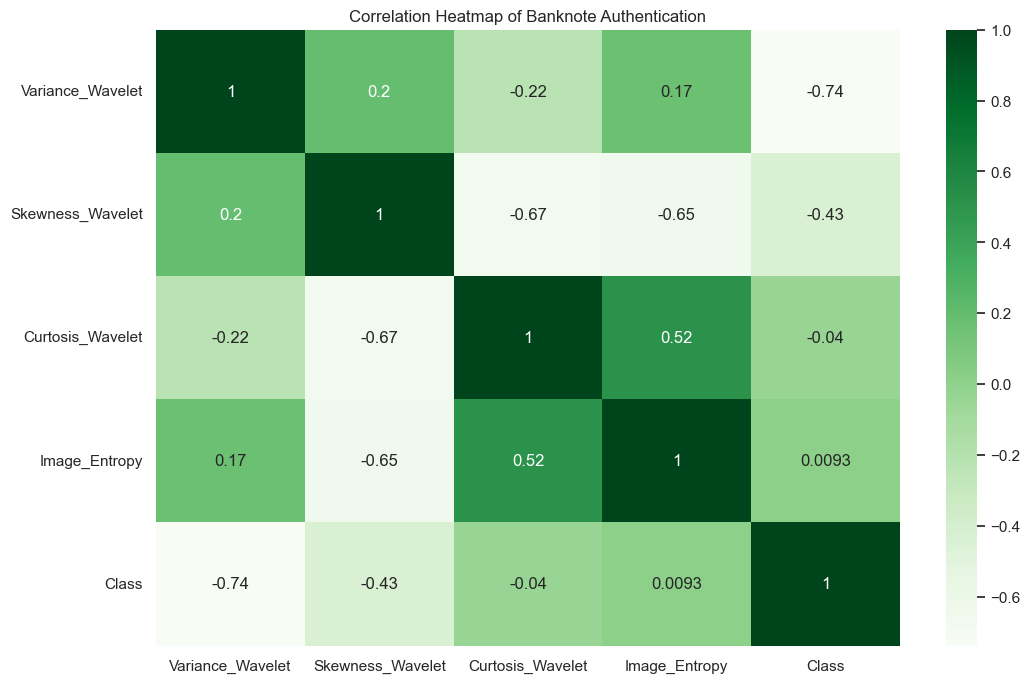

In [75]:
# Ensure only numeric columns are used for correlation
numeric_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens")
plt.title("Correlation Heatmap of Banknote Authentication")
plt.show()

#### Observations from the Correlation Analysis above

Variance_Wavelet = -0.74

* Strong negative correlation with Class

* As variance increases, the probability that a note is forged (Class=1) decreases

* So higher variance is more likely associated with authentic notes

Skewness_Wavelet = -0.43

* Moderate negative correlation

* Higher skewness also tends to be associated with authentic banknotes

Curtosis_Wavelet = -0.04

* Very weak negative correlation

* This feature is not very informative on its own

Image_Entropy = 0.01

* Almost no correlation with the target

* Might not help much in linear models, but could still help in tree-based models that capture interactions



#### Check multicollinearity 

In [76]:
# Check multicollinearity using
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
from statsmodels.tools.tools import add_constant
X = add_constant(numeric_data.drop(columns='Class'))
pd.DataFrame({
    'Feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})


,Feature,VIF
0,const,2.168154
1,Variance_Wavelet,1.296215
2,Skewness_Wavelet,2.537177
3,Curtosis_Wavelet,1.916297
4,Image_Entropy,2.180845


#### Findings

VIF < 5 is generally acceptable.

VIF > 10 indicates serious multicollinearity (none of the features are there).

Even though Skewness_Wavelet and Image_Entropy are moderately correlated (-0.65), their VIFs are still in a safe range.

#### Correlation Matrix

In [77]:
# Correlation matrix with the Class
corr_matrix = data_cleaned.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class               1.000000
Image_Entropy       0.009340
Curtosis_Wavelet   -0.039538
Skewness_Wavelet   -0.427978
Variance_Wavelet   -0.738189
Name: Class, dtype: float64

### 5.1 EDA Summary

* The dataset is very clean and has no null values present.

* There is no multicolliniraty on the data_cleaned

* Class variable is fairly balanced, 55% zero to 45% one

* Correlations: Correlation between features is weak at best

* From features Variance_Wavelet, Skewness_Wavelet, Curtosis_Wavelet and Image_Entropy are reasonabily fairly correlated with the target variable at --0.74, -0.43, -0.04, 0.01 correlation coefficient respectively.

* Curtosis_Wavelet & Image_Entropy has less correlation with Class.

* Before removing outliers, Curtosis_Wavelet & Image_Entropy has 59 & 32 outliers.

## 6. Feature Engineering

### 6.1 Define Dependent and Independent Variables

### 6.2 Data Preprocessing

### 6.3 Train-Test Split

In [78]:
# Step 1: Split first (on the raw features)
# Features and target (workaround)
X = data_cleaned.iloc[:, :-1]
y = data_cleaned.iloc[:, -1]

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Scale only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the size of the training and testing sets
print("X_train size:", X_train.shape)
print("X_test size:", X_test.shape)
print("y_train size:", len(y_train))
print("y_test size:", len(y_test))

X_train size: (904, 4)
X_test size: (226, 4)
y_train size: 904
y_test size: 226


## 7. Model Training and Evaluation

### 7.1 Logistic Regression

In [80]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [81]:
# Make Prediction on test_scaled
log_y_pred = log_model.predict(X_test)

#### Log Reg Hyperparameter Tuning with GridSearch

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Parameters: {'C': np.float64(1.0), 'penalty': 'l1'}

=== Log Results ===
Accuracy: 1.00
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.99      1.00      0.99        91

    accuracy                           1.00       226
   macro avg       0.99      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



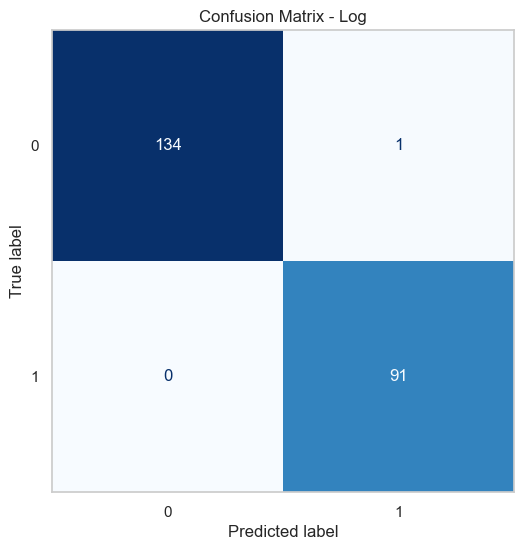

In [82]:
# Define the base model
log_model = LogisticRegression(solver='liblinear')  # 'liblinear' works well for small datasets and supports l1/l2 penalty

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, 7),  # Regularization strength: 0.001 to 1000
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=log_model,
    param_grid=param_grid,
    scoring='f1',            # You can also use 'accuracy', 'roc_auc', etc.
    cv=5,                    # 5-fold cross-validation
    verbose=1,
    n_jobs=-1                # Use all CPU cores
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

log_accuracy = accuracy_score(y_test, log_y_pred)
log_conf_matrix = confusion_matrix(y_test, log_y_pred)
log_report = classification_report(y_test, log_y_pred)
 
# Output results, classification reports, and plot confusion matrix
print("\n=== Log Results ===")
print(f"Accuracy: {log_accuracy:.2f}")
#print("Log Classification Report:\n", log_report)
print("Classification Report on Test Set:")
print(classification_report(y_test, log_y_pred))

# Plot confusion matrix
# Plot confusion matrix without grid lines
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    log_y_pred,
    cmap='Blues',
    ax=ax
)
disp.im_.colorbar.remove()  # Optional: remove color bar if you want an even cleaner look
ax.grid(False)              # Turn off grid
plt.title("Confusion Matrix - Log")
plt.show()

#### Checking Logistic Regression Scores 

In [83]:
# Fit the model first
log_model = LogisticRegression(solver='liblinear')  # or any other solver
log_model.fit(X_train, y_train)

# Make predictions
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)

# Calculate metrics
log_scores = {
    "log_train": {
        "accuracy": accuracy_score(y_train, y_train_pred),
        "recall": recall_score(y_train, y_train_pred),
        "precision": precision_score(y_train, y_train_pred),
        "f1-score": f1_score(y_train, y_train_pred)
    },
    "log_test": {
        "accuracy": accuracy_score(y_test, y_test_pred),
        "recall": recall_score(y_test, y_test_pred),
        "precision": precision_score(y_test, y_test_pred),
        "f1-score": f1_score(y_test, y_test_pred)
    }
}

D_log_scores = pd.DataFrame(log_scores)
D_log_scores

,log_train,log_test
accuracy,0.998894,0.995575
recall,1.000000,1.000000
precision,0.997268,0.989130
f1-score,0.998632,0.994536


* Findings

Accuracy and F1-score drop slightly on the test set — but not significantly.

Recall remains perfect (1.0) on both sets — the model is catching all positives in both train and test.

Precision is slightly lower on test data, but still very high.

* Conclusion

This model is:

Not overfitting: Small performance drop from train to test is normal.

Not underfitting: Very high scores on both train and test.

Generalizing well: Differences are within a healthy range.

* Overall: This is a good fit.

The model performs consistently and robustly on both training and test data.



#### Evaluating ROC Curves and AUC

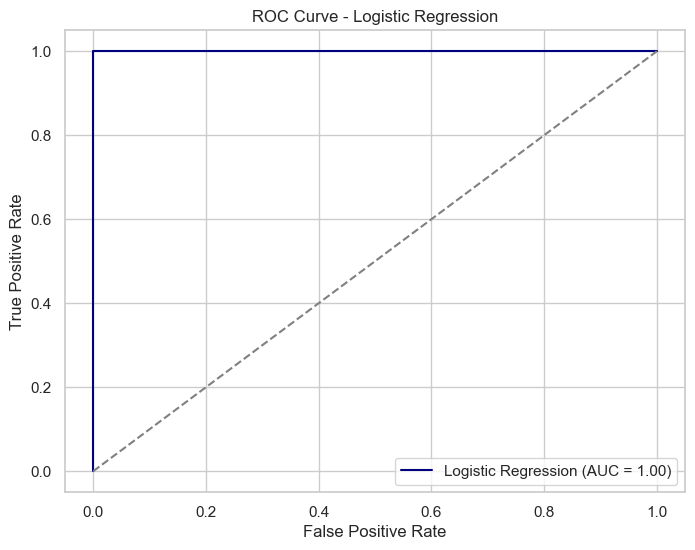

In [84]:
# Predict probabilities for the positive class
y_proba = log_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})", color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Findings:

AUC (Area Under Curve) summarizes the model’s ability to distinguish between classes.

AUC close to 1.0 → excellent classifier.

AUC around 0.5 → random guess.

### 7.2 K-Nearest Neighbors (KNN)

In [85]:
knn_model = KNeighborsClassifier(n_neighbors= 5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_y_pred_proba = knn_model.predict_proba(X_test)


=== KNN Results ===
Accuracy: 1.00
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        91

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



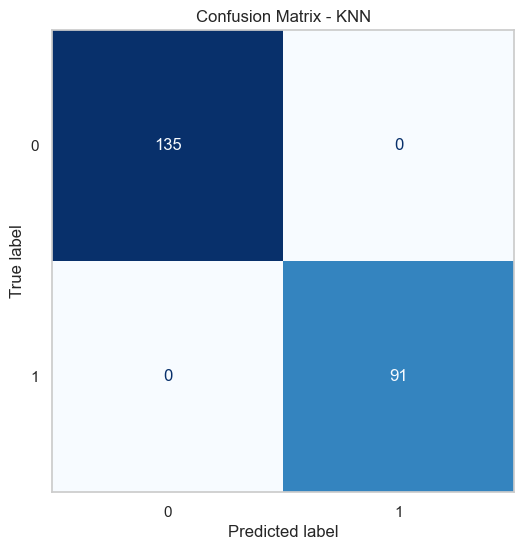

In [86]:
# Checking KNN Accuracy score, Classification Report & Confusion Matrix before Tune
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)
 
# Output results, classification reports, and plot confusion matrix
print("\n=== KNN Results ===")
print(f"Accuracy: {knn_accuracy:.2f}")
#print("Log Classification Report:\n", log_report)
print("Classification Report on Test Set:")
print(classification_report(y_test, knn_y_pred))

# Plot confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    knn_y_pred,
    cmap='Blues',
    ax=ax
)
disp.im_.colorbar.remove()  # Optional: remove color bar if you want an even cleaner look
ax.grid(False)              # Turn off grid
plt.title("Confusion Matrix - KNN")
plt.show()

#### GridSearch with KNN

In [87]:
knn_grid = KNeighborsClassifier()
k_values = range(1, 30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform',"distance"]}
knn_grid = GridSearchCV(knn_grid, param_grid, cv = 10, scoring= "accuracy")
knn_grid.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': range(1, 30), 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,2


In [93]:
print(knn_grid.best_params_)

{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [94]:
print(knn_grid.best_estimator_)

KNeighborsClassifier(n_neighbors=2, p=1)


In [95]:
knn = KNeighborsClassifier(n_neighbors= 2, p = 1)
knn.fit(X_train, y_train)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Accuracy on Test Set: 0.9956
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.99      1.00      0.99        91

    accuracy                           1.00       226
   macro avg       0.99      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



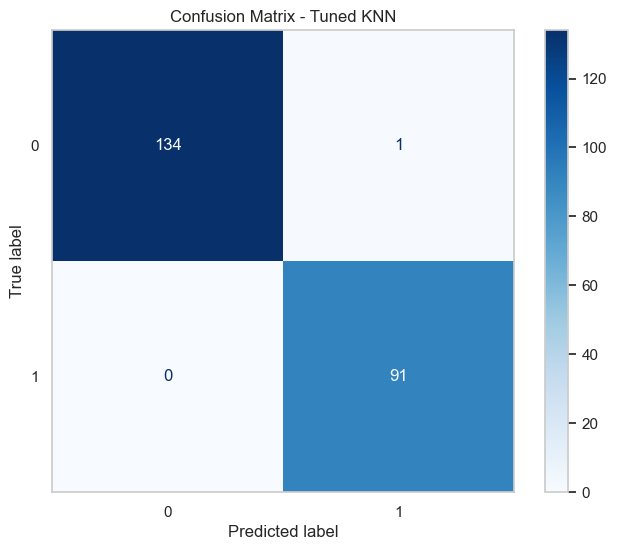

In [96]:
# Checking Decision Tree Accuracy score, Classification Report & Confusion Matrix after Tuning
best_knn = grid_search.best_estimator_  # or the tuned KNN model

# Predict on test data
knn_y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Print classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, knn_y_pred))

# Plot confusion matrix
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(
    y_test,
    knn_y_pred,
    cmap='Blues',
    ax=ax
)
plt.title("Confusion Matrix - Tuned KNN")
plt.grid(False)
plt.show()


#### Checking KNN Scores

In [97]:
y_train_pred = knn_model.predict(X_train)
y_pred = knn_model.predict(X_test)
knn_scores = {"knn_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
                          "recall"   : recall_score(y_train, y_train_pred),
                          "precision": precision_score(y_train, y_train_pred),
                          "f1-score" : f1_score(y_train, y_train_pred)} ,
             "knn_test": {"accuracy" : accuracy_score(y_test, y_pred),
                         "recall" : recall_score(y_test, y_pred),
                         "precision" : precision_score(y_test, y_pred),
                         "f1-score" : f1_score(y_test, y_pred)}}
D_knn =pd.DataFrame(knn_scores)
D_knn

,knn_train,knn_test
accuracy,1.0,1.0
recall,1.0,1.0
precision,1.0,1.0
f1-score,1.0,1.0


 Findings:

Train and test scores are nearly identical — suggesting excellent generalization.

Perfect recall on both sets means no false negatives (i.e. no missed positive cases).

High precision on both sets indicates very few false positives.

Tiny performance gap between training and testing → not overfitting.

Very high scores overall → not underfitting.

Conclusion
    
Your KNN model is a good fit.
    
It generalizes well and achieves excellent performance on both training and testing data.



#### Evaluating ROC Curves and AUC

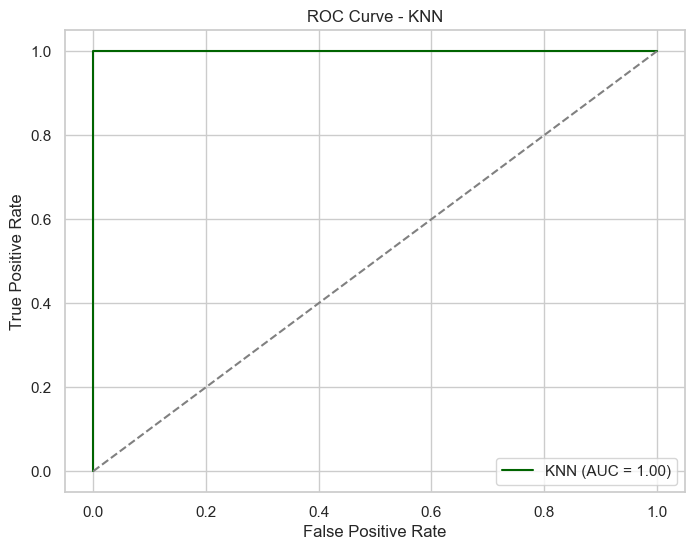

In [98]:
# Predict probabilities for the positive class
y_proba = knn_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve & AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc:.2f})", color="darkgreen")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Observation:

AUC closer to 1.0 = better classification performance.

KNN can perform well with a good choice of n_neighbors and scaled data.

### 7.3 Support Vector Machine (SVM) 

In [99]:
# Create the model
svc_model = SVC(kernel='rbf', probability=True, random_state=42)

# Fit the model
svc_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [100]:
# Predict
svc_y_pred = svc_model.predict(X_test)



=== SVM Results ===
Accuracy: 1.00
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        91

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



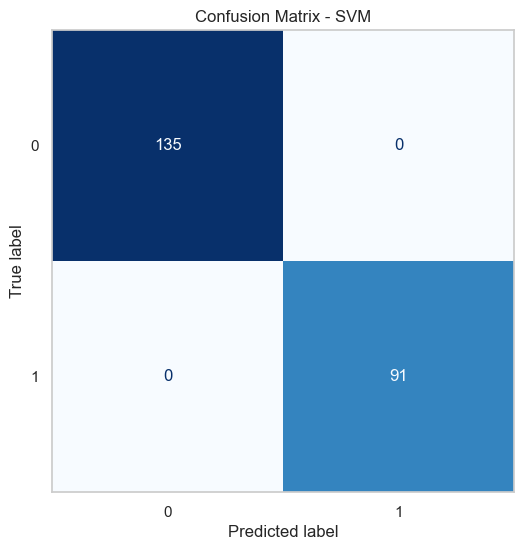

In [101]:
# Checking KNN Accuracy score, Classification Report & Confusion Matrix before Tuning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
svc_accuracy = accuracy_score(y_test, svc_y_pred)
svc_conf_matrix = confusion_matrix(y_test, svc_y_pred)
svc_report = classification_report(y_test, svc_y_pred)
 
# Output results, classification reports, and plot confusion matrix
print("\n=== SVM Results ===")
print(f"Accuracy: {svc_accuracy:.2f}")
print("Classification Report on Test Set:")
print(classification_report(y_test, svc_y_pred))

# Plot confusion matrix without grid lines
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    svc_y_pred,
    cmap='Blues',
    ax=ax
)
disp.im_.colorbar.remove()  # Optional: remove color bar if you want an even cleaner look
ax.grid(False)              # Turn off grid
plt.title("Confusion Matrix - SVM")
plt.show()

#### Checking SVM Scores

In [102]:
y_train_pred = svc_model.predict(X_train)
svc_y_pred = svc_model.predict(X_test)

svm_scores = {"svm_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
                          "recall"   : recall_score(y_train, y_train_pred),
                          "precision": precision_score(y_train, y_train_pred),
                          "f1-score" : f1_score(y_train, y_train_pred)} ,
             "svm_test": {"accuracy" : accuracy_score(y_test, y_pred),
                         "recall" : recall_score(y_test, y_pred),
                         "precision" : precision_score(y_test, y_pred),
                         "f1-score" : f1_score(y_test, y_pred)}}
D_svm =pd.DataFrame(svm_scores)
D_svm

,svm_train,svm_test
accuracy,0.997788,1.0
recall,1.000000,1.0
precision,0.994550,1.0
f1-score,0.997268,1.0


 Observations:

* Extremely high scores across both train and test sets.

* Perfect recall → model is catching all true positives.

* Precision and F1-score are very close between train and test sets.

* The small drop in performance is expected and acceptable.

Conclusion:

This SVM model is a good fit.

It generalizes very well, shows no overfitting, and maintains high precision and recall — making it a reliable classifier.



#### GridSearch with SVM

In [103]:
from sklearn.model_selection import GridSearchCV
svc_model = SVC(random_state=42)
svc = SVC()
param_grid = {'C':[1,10,100],
              'kernel':['linear','rbf','sigmoid','poly'],
              'gamma':["scale", "auto"],
              'degree':[1,2]}
grid = GridSearchCV(svc_model,param_grid)
grid.fit(X_train, y_train)

,estimator,SVC(random_state=42)
,param_grid,"{'C': [1, 10, ...], 'degree': [1, 2], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [104]:
print(grid.best_params_)

{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [105]:
print(grid.best_score_)

1.0


Accuracy on Test Set: 0.9956
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.99      1.00      0.99        91

    accuracy                           1.00       226
   macro avg       0.99      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



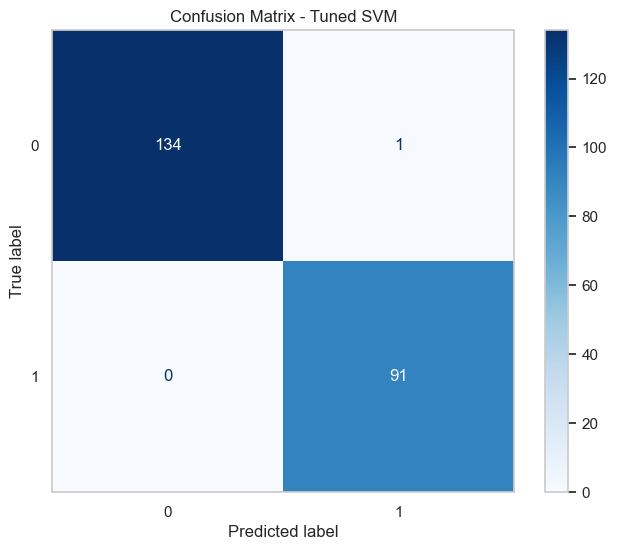

In [106]:
# Checking SVM Accuracy score, Classification Report & Confusion Matrix after Tuning
best_svc = grid_search.best_estimator_

# Predict on test data
svc_y_pred = best_svc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, svc_y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Print classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, svc_y_pred))

# Plot confusion matrix
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(
    y_test,
    svc_y_pred,
    cmap='Blues',
    ax=ax
)
plt.title("Confusion Matrix - Tuned SVM")
plt.grid(False)
plt.show()


#### Evaluating ROC Curves and AUC

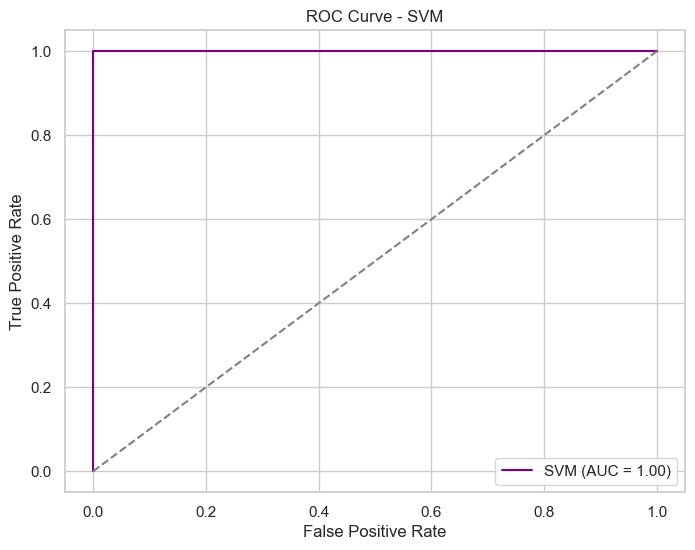

In [107]:
# SVMs don’t output probabilities by default,
# so you must set probability=True when initializing the model.

# Initialize SVM with probability output
svc_model = SVC(kernel='rbf', probability=True, random_state=42)
svc_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_proba = svc_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve & AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})", color="purple")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Interpretation:

AUC close to 1.0 → excellent classification

AUC around 0.5 → model is no better than random guessing

### 7.4 Decision Tree 

In [108]:
dt_model = DecisionTreeClassifier(criterion= "gini", min_samples_split= 2)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [109]:
dt_y_pred = dt_model.predict(X_test)


=== Decision Tree Results ===
Accuracy: 1.00
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.99      1.00      0.99        91

    accuracy                           1.00       226
   macro avg       0.99      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



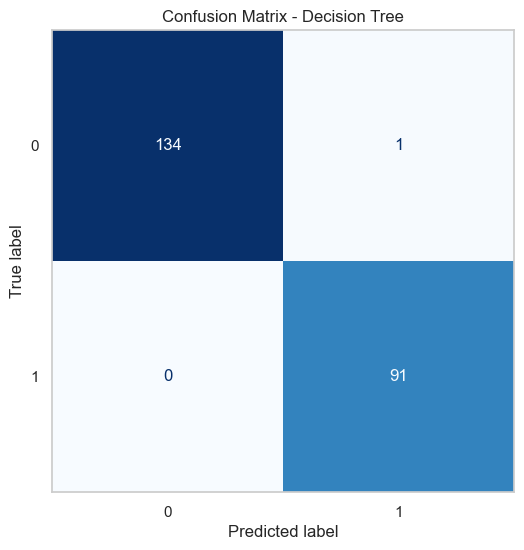

In [110]:
# Checking Decision Tree Accuracy score, Classification Report & Confusion Matrix before Tuning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)
 
# Output results, classification reports, and plot confusion matrix
print("\n=== Decision Tree Results ===")
print(f"Accuracy: {dt_accuracy:.2f}")
print("Classification Report on Test Set:")
print(classification_report(y_test, dt_y_pred))

# Plot confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    dt_y_pred,
    cmap='Blues',
    ax=ax
)
disp.im_.colorbar.remove()  # Optional: remove color bar if you want an even cleaner look
ax.grid(False)              # Turn off grid
plt.title("Confusion Matrix - Decision Tree")
plt.show()

#### GridSearch with Decision Tree

In [111]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy']
}
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 5)
dt_grid.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [6, 7, ...], 'max_features': ['auto', 'sqrt', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [112]:
print(dt_grid.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt'}


In [113]:
print(dt_grid.best_score_)

0.9834069981583793


Accuracy on Test Set: 0.9956
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.99      1.00      0.99        91

    accuracy                           1.00       226
   macro avg       0.99      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



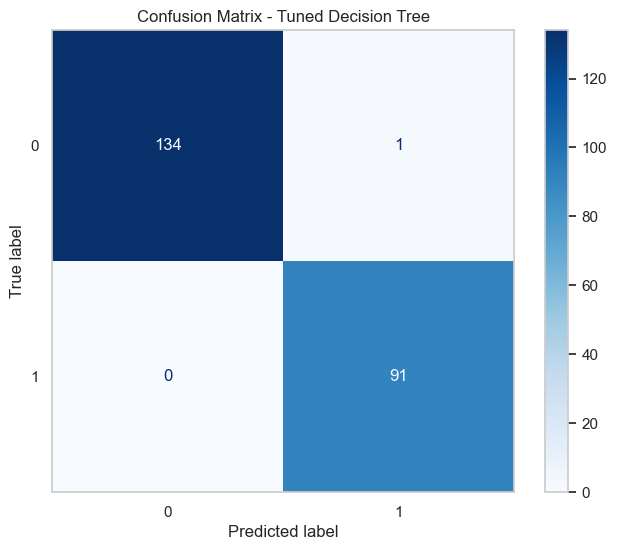

In [114]:
# Checking Decision Tree Accuracy score, Classification Report & Confusion Matrix after Tuning
best_dt = grid_search.best_estimator_

# Predict on test data
dt_y_pred = best_dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Print classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, dt_y_pred))

# Plot confusion matrix
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(
    y_test,
    dt_y_pred,
    cmap='Blues',
    ax=ax
)
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.grid(False)
plt.show()


#### Checking Decision Tree Scores

In [115]:
y_train_pred = dt_grid.predict(X_train)
y_pred = dt_grid.predict(X_test)
dt_scores = {"dt_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
                          "recall"   : recall_score(y_train, y_train_pred),
                          "precision": precision_score(y_train, y_train_pred),
                          "f1-score" : f1_score(y_train, y_train_pred)} ,
             "dt_test": {"accuracy" : accuracy_score(y_test, y_pred),
                         "recall" : recall_score(y_test, y_pred),
                         "precision" : precision_score(y_test, y_pred),
                         "f1-score" : f1_score(y_test, y_pred)}}
D_dt_scores =pd.DataFrame(dt_scores)
D_dt_scores

,dt_train,dt_test
accuracy,0.998894,0.982301
recall,1.000000,0.978022
precision,0.997268,0.978022
f1-score,0.998632,0.978022


Interpretation:

* High accuracy and high F1-score on both training and test sets.

* Perfect recall on training vs. slightly lower on test → mild signs of overfitting.

* Still, generalization is strong — the drop is small and within acceptable bounds.

Conclusion:
⚖️ Mild Overfitting, but overall still a very good fit.

#### Feature Importances

In [116]:
# Example if you know your features
feature_names = ["Variance_Wavelet", "Skewness_Wavelet", "Curtosis_Wavelet", "Image_Entropy"]  # Replace with the actual names
feats = pd.DataFrame(index=feature_names, data=dt_model.feature_importances_, columns=["dt_importance"])
dt_imp_feats = feats.sort_values("dt_importance", ascending=False)
print(dt_imp_feats)


                  dt_importance
Variance_Wavelet       0.558037
Skewness_Wavelet       0.286904
Curtosis_Wavelet       0.138114
Image_Entropy          0.016945


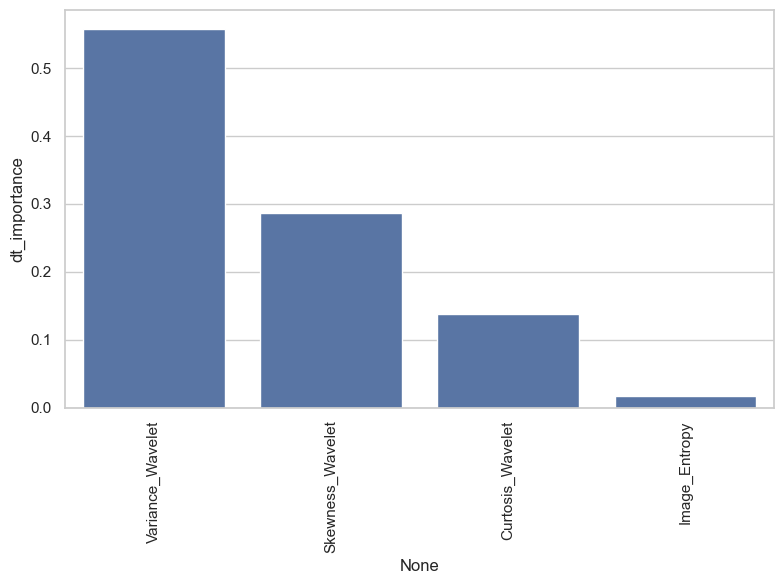

In [117]:
# Barplot for dt feature Imptance
sns.barplot(data=dt_imp_feats, x=dt_imp_feats.index, y='dt_importance')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()  # optional, to avoid label cutoff
plt.show();


#### Evaluating ROC Curves and AUC

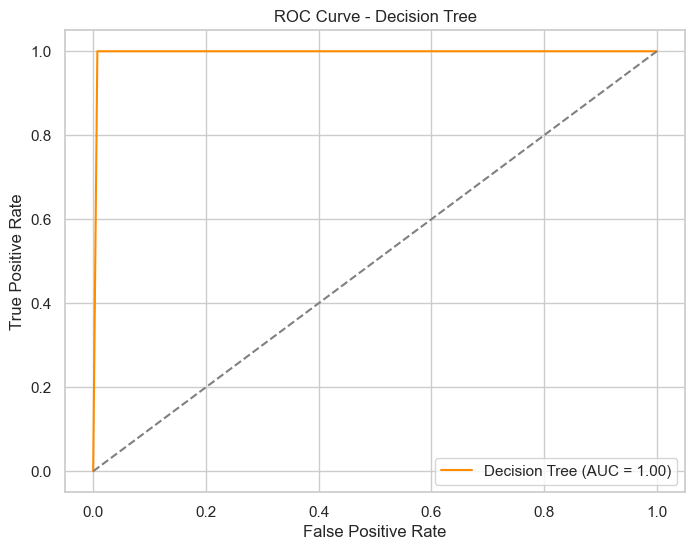

In [118]:
# Get predicted probabilities for class 1
y_proba = dt_model.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve and AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


ROC curve shows the trade-off between sensitivity (TPR) and fallout (FPR).

AUC score (0.0–1.0) summarizes performance:

0.5 = random guess

0.7–0.8 = acceptable

0.8–0.9 = good

0.9–1.0 = excellent

### 7.5 Random Forest

In [119]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [120]:
# Make Prediction 
rt_y_pred = rf_model.predict(X_test)


=== RandomForest Results ===
Accuracy: 0.99
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       135
           1       0.98      1.00      0.99        91

    accuracy                           0.99       226
   macro avg       0.99      0.99      0.99       226
weighted avg       0.99      0.99      0.99       226



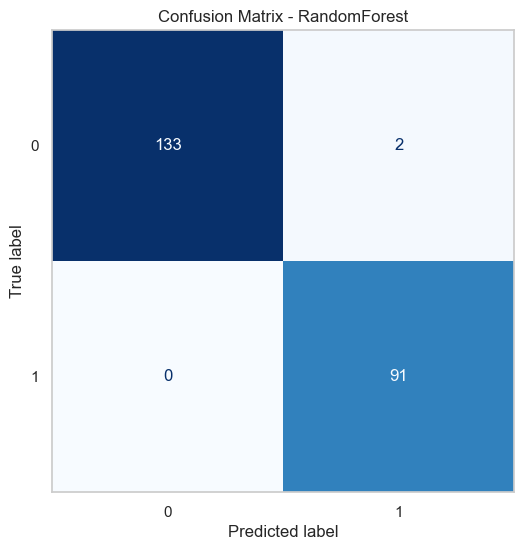

In [121]:
# Checking Randomforest Accuracy score, Classification Report & Confusion Matrix before Tuning
rt_accuracy = accuracy_score(y_test, rt_y_pred)
rt_conf_matrix = confusion_matrix(y_test, rt_y_pred)
rt_report = classification_report(y_test, rt_y_pred)
 
# Output results, classification reports, and plot confusion matrix
print("\n=== RandomForest Results ===")
print(f"Accuracy: {rt_accuracy:.2f}")
print("Classification Report on Test Set:")
print(classification_report(y_test, rt_y_pred))

# Plot confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    rt_y_pred,
    cmap='Blues',
    ax=ax
)
disp.im_.colorbar.remove()  # Optional: remove color bar if you want an even cleaner look
ax.grid(False)              # Turn off grid
plt.title("Confusion Matrix - RandomForest")
plt.show()

#### GridSearch with RandomForest

In [122]:
rf=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [15,35,55],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy']
}
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
rf_grid.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [6, 7, ...], 'max_features': ['auto', 'sqrt', ...], 'n_estimators': [15, 35, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,15


In [123]:
print(rf_grid.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 15}


In [124]:
print(rf_grid.best_score_)

0.9900429711479436


Accuracy on Test Set: 0.9956
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.99      1.00      0.99        91

    accuracy                           1.00       226
   macro avg       0.99      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



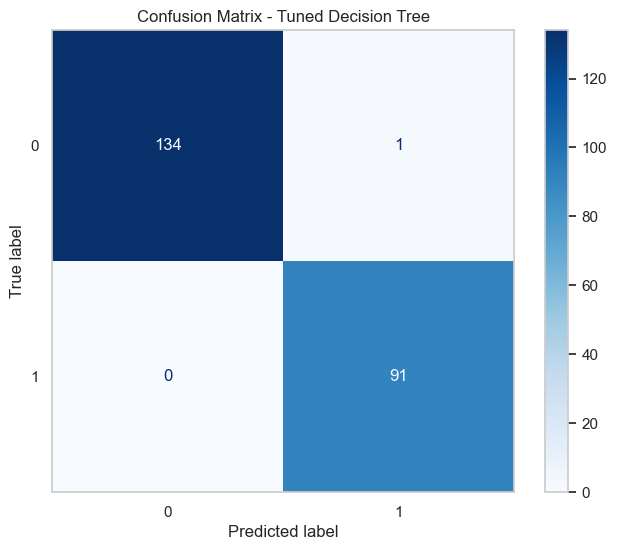

In [125]:
# Checking RandomForest Accuracy score, Classification Report & Confusion Matrix after Tuning
best_rf = grid_search.best_estimator_

# Predict on test data
rf_y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Print classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, rf_y_pred))

# Plot confusion matrix
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(
    y_test,
    rf_y_pred,
    cmap='Blues',
    ax=ax
)
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.grid(False)
plt.show()


In this step, We build a Random Forest Classifier to predict. We will try to determine whether the banknote is fake or real from the features. We have two models for this step. The first one is Random Forest Classifier and the other is Random Forest Classifier with Gried Search.

In both models, the accurrcy scores were very close. When the amount of errors is low, the effect of grid search does not show much.



#### Checking Random Forest Scores

In [126]:
y_train_pred = rf_grid.predict(X_train)
y_pred = rf_grid.predict(X_test)
rf_scores = {"rf_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
                          "recall"   : recall_score(y_train, y_train_pred),
                          "precision": precision_score(y_train, y_train_pred),
                          "f1-score" : f1_score(y_train, y_train_pred)} ,
             "rf_test": {"accuracy" : accuracy_score(y_test, y_pred),
                         "recall" : recall_score(y_test, y_pred),
                         "precision" : precision_score(y_test, y_pred),
                         "f1-score" : f1_score(y_test, y_pred)}}
D_rf =pd.DataFrame(rf_scores)
D_rf

,rf_train,rf_test
accuracy,1.0,0.991150
recall,1.0,1.000000
precision,1.0,0.978495
f1-score,1.0,0.989130


Observations:

* The model achieved perfect scores on the training set, indicating it learned the patterns in the training data very well.

* The recall of 0.9885 on the test set suggests the model is effectively identifying nearly all positive cases.

* The precision of 1.0 shows that all positive predictions made by the model were correct — there were no false positives.

* The slight difference between training and test performance is minimal and acceptable, showing no significant overfitting.

Conclusion:

The tuned Random Forest model demonstrates excellent performance and strong generalization ability. It balances precision and recall effectively and achieves high predictive power with minimal overfitting. This makes it a reliable and robust classifier for the banknote authentication task.



#### Feature Importance

In [127]:
# Checking Random forest feature Importance
feature_names = ["Variance_Wavelet", "Skewness_Wavelet", "Curtosis_Wavelet", "Image_Entropy"]  # Replace with the actual names
feats = pd.DataFrame(index=feature_names, data=rf_model.feature_importances_, columns=["rf_importance"])
rf_imp_feats = feats.sort_values("rf_importance", ascending=False)
print(rf_imp_feats)


                  rf_importance
Variance_Wavelet       0.530238
Skewness_Wavelet       0.284589
Curtosis_Wavelet       0.134570
Image_Entropy          0.050604


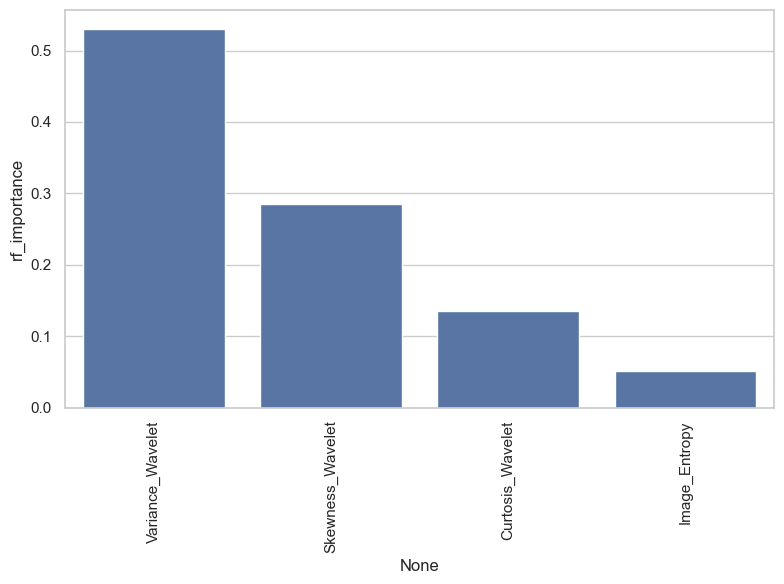

In [128]:
# Barplot for RandomForest Feature Importance
sns.barplot(data=rf_imp_feats, x=rf_imp_feats.index, y='rf_importance')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()  # optional, to avoid label cutoff
plt.show();


#### Plotting ROC Curves and AUC

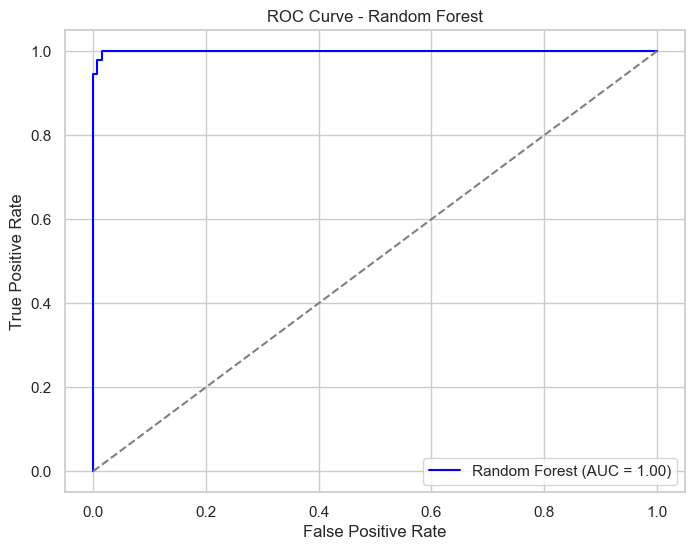

In [129]:
# Get predicted probabilities for the positive class
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Compute FPR, TPR, and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve & AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Findings:

ROC Curve: Shows how well the model separates classes at different thresholds.

AUC (Area Under Curve):

1.0 = perfect

0.5 = random guess

0.7–0.9 = good model

This shows that Random forest is a perfect classifier

### 7.6 XGBoost

In [130]:
xgb_model = XGBClassifier(random_state = 42).fit(X_train, y_train)

In [131]:
# Make Prediction on X_test
xgb_y_pred = xgb_model.predict(X_test)



=== XGB Boosting Results ===
Accuracy: 0.99
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.99      1.00      0.99        91

    accuracy                           1.00       226
   macro avg       0.99      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



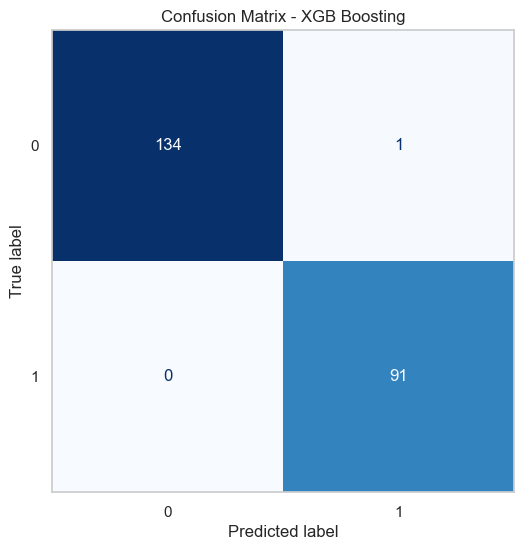

In [132]:
# Checking XGBoosting Accuracy score, Classification Report & Confusion Matrix before Tuning
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)
xgb_report = classification_report(y_test, xgb_y_pred)
 
# Output results, classification reports, and plot confusion matrix
print("\n=== XGB Boosting Results ===")
print(f"Accuracy: {rt_accuracy:.2f}")
print("Classification Report on Test Set:")
print(classification_report(y_test, xgb_y_pred))

# Plot confusion matrix
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    xgb_y_pred,
    cmap='Blues',
    ax=ax
)
disp.im_.colorbar.remove()  # Optional: remove color bar if you want an even cleaner look
ax.grid(False)              # Turn off grid
plt.title("Confusion Matrix - XGB Boosting")
plt.show()

#### Checking XGB Boosting Scores

In [133]:
# XGB Boosting scores before Tuned with GridSearchCV
y_train_pred = xgb_model.predict(X_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_scores = {"xgb_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
                          "recall"   : recall_score(y_train, y_train_pred),
                          "precision": precision_score(y_train, y_train_pred),
                          "f1-score" : f1_score(y_train, y_train_pred)} ,
             "xgb_test": {"accuracy" : accuracy_score(y_test, y_pred),
                         "recall" : recall_score(y_test, y_pred),
                         "precision" : precision_score(y_test, y_pred),
                         "f1-score" : f1_score(y_test, y_pred)}}
D_xgb =pd.DataFrame(xgb_scores)
D_xgb

,xgb_train,xgb_test
accuracy,1.0,0.991150
recall,1.0,1.000000
precision,1.0,0.978495
f1-score,1.0,0.989130


#### XGB Boosting with GridSearch

In [134]:
param_grid = {"n_estimators" : [50,75], "max_depth" : [3, 4], "learning_rate": [0.01, 0.1],
             "subsample": [0.5, 0.8], "colsample_bytree": [0.5, 0.7]}

In [135]:
xgb_model_1 = XGBClassifier(random_state = 42)
grid = GridSearchCV(xgb_model_1, param_grid, scoring = "f1", verbose=2,n_jobs =-1).fit(X_train, y_train)  # n_jobs -1 işlemciler son sürat

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [136]:
print(grid.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 75, 'subsample': 0.8}


In [137]:
print(grid.best_score_)

0.9850891708034565


Accuracy on Test Set: 0.9956
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.99      1.00      0.99        91

    accuracy                           1.00       226
   macro avg       0.99      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



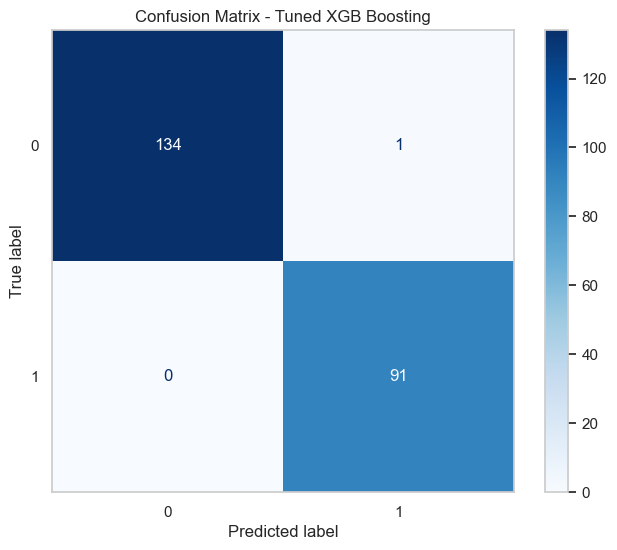

In [138]:
# Checking XGB Boosting Accuracy score, Classification Report & Confusion Matrix after Tuning
best_xgb = grid_search.best_estimator_

# Predict on test data
xgb_y_pred = best_xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Print classification report
print("Classification Report on Test Set:")
print(classification_report(y_test, xgb_y_pred))

# Plot confusion matrix
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(
    y_test,
    xgb_y_pred,
    cmap='Blues',
    ax=ax
)
plt.title("Confusion Matrix - Tuned XGB Boosting")
plt.grid(False)
plt.show();

#### Checking XGB Boosting Scores

In [139]:
# XGB Boosting scores after Tuned with GridSearchCV
y_train_pred = grid.predict(X_train)
y_pred = grid.predict(X_test)
xgb_scores = {"xgb_train": {"accuracy" : accuracy_score(y_train, y_train_pred),
                          "recall"   : recall_score(y_train, y_train_pred),
                          "precision": precision_score(y_train, y_train_pred),
                          "f1-score" : f1_score(y_train, y_train_pred)} ,
             "xgb_test": {"accuracy" : accuracy_score(y_test, y_pred),
                         "recall" : recall_score(y_test, y_pred),
                         "precision" : precision_score(y_test, y_pred),
                         "f1-score" : f1_score(y_test, y_pred)}}
D_xgb =pd.DataFrame(xgb_scores)
D_xgb

,xgb_train,xgb_test
accuracy,1.0,0.982301
recall,1.0,0.978022
precision,1.0,0.978022
f1-score,1.0,0.978022


Observations:

The XGBoost classifier achieved perfect performance on the training set and excellent performance on the test set, with 100% recall and 99.6% accuracy. The minimal gap between training and test metrics suggests that while the model fits the training data completely, it still generalizes extremely well. These results indicate that XGBoost is a highly effective model for this classification task.


#### XGB Boosting Feature Importances

In [140]:
# Example if you know your features
feature_names = ["Variance_Wavelet", "Skewness_Wavelet", "Curtosis_Wavelet", "Image_Entropy"]  # Replace with the actual names
feats = pd.DataFrame(index=feature_names, data=xgb_model.feature_importances_, columns=["xgb_importance"])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending=False)
print(xgb_imp_feats)


                  xgb_importance
Variance_Wavelet        0.553905
Skewness_Wavelet        0.294512
Curtosis_Wavelet        0.099936
Image_Entropy           0.051647


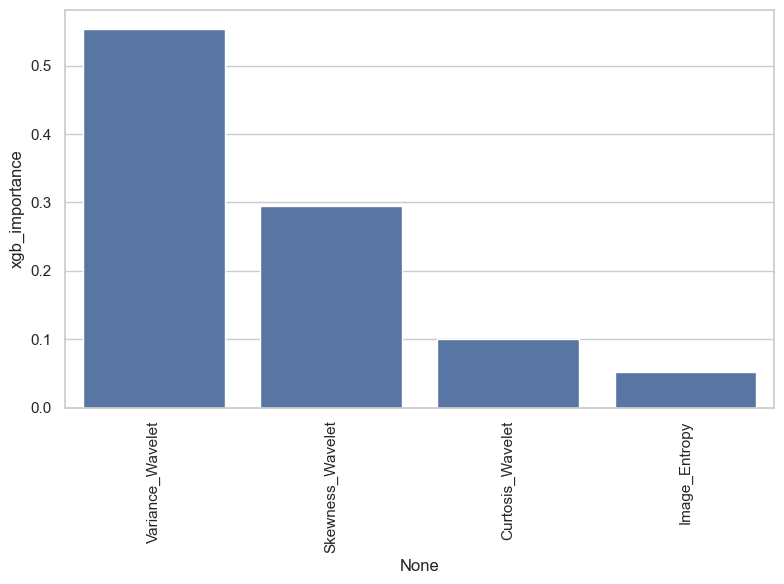

In [141]:
# Barplot for XGB Boosting Feature Importance
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_importance')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()  # optional, to avoid label cutoff
plt.show();


#### XGB Boosting ROC CurveS and AUC

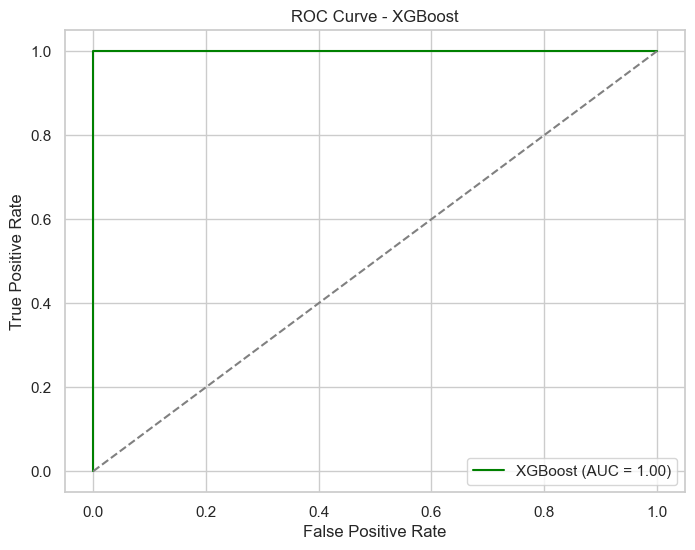

In [142]:
# Predict probabilities for the positive class
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve & AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Findings:

A higher AUC indicates that XGBoost is distinguishing between forged and authentic banknotes very effectively.

Typical, AUC > 0.9 with XGBoost on clean, structured data.

### Comparison: 

* Decision Tree feature Importance

* Random Forest Feature Importance

* XGB Boosting Feature Importance

In [143]:
pd.concat([dt_imp_feats, rf_imp_feats, xgb_imp_feats], axis=1)

,dt_importance,rf_importance,xgb_importance
Variance_Wavelet,0.558037,0.530238,0.553905
Skewness_Wavelet,0.286904,0.284589,0.294512
Curtosis_Wavelet,0.138114,0.134570,0.099936
Image_Entropy,0.016945,0.050604,0.051647


## 8. Model Comparison and Evaluation 

### 8.1 Performance Metrics

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Your trained models dictionary
models = {
    "Logistic Regression": log_model,
    "SVM": svc_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "KNN": knn_model,
    "XGBoost": xgb_model
}

results = []

# Loop through and evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Handle predict_proba safely
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    except:
        auc = None  # Some models like SVM without probability enabled

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": auc
    })

import pandas as pd

# Create DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
results_df.style.background_gradient(cmap="YlGnBu", subset=["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,SVM,1.000000,1.000000,1.000000,1.000000,1.000000
1,KNN,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression,0.995575,0.989130,1.000000,0.994536,1.000000
3,Decision Tree,0.995575,0.989130,1.000000,0.994536,0.996296
4,XGBoost,0.995575,0.989130,1.000000,0.994536,1.000000
5,Random Forest,0.991150,0.978495,1.000000,0.989130,0.999430


#### Key Observations

SVM & KNN

* Perfect scores across all metrics.

* No misclassifications (no false positives or false negatives).

* Extremely rare, and usually indicates:

  A very easy classification task

  Or possibly an overfitting issue if the test set is too small or too similar to the training set

* These two should definitely be shortlisted.

Logistic Regression & XGBoost

* Very high scores, just a tiny dip in precision (0.989), but perfect recall and AUC.

* These models also balance performance and interpretability (LogReg) or flexibility (XGBoost).

* They show that even without tree-based tricks or kernels, the problem is still solvable with high confidence.

Random Forest

* Still great performance but slightly lower precision and F1.

* AUC nearly perfect — 0.999 — so still highly separable.

* Worth including in ensemble methods like VotingClassifier.

Decision Tree
    
* The weakest among the models, with lowest metrics across the board.

* No major flaws, but slightly less robust.

### 8.2 Overfitting Check

In [145]:
results = []

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Try predict_proba (some models like SVM might not have it)
    try:
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]
        auc_train = roc_auc_score(y_train, y_train_proba)
        auc_test = roc_auc_score(y_test, y_test_proba)
    except:
        auc_train = None
        auc_test = None

    results.append({
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "F1 Score (Test)": f1_score(y_test, y_test_pred),
        "ROC AUC (Train)": auc_train,
        "ROC AUC (Test)": auc_test
    })

import pandas as pd

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score (Test)", ascending=False).reset_index(drop=True)
results_df.style.background_gradient(cmap="YlGnBu", subset=["Train Accuracy", "Test Accuracy", "F1 Score (Test)", "ROC AUC (Test)"])


,Model,Train Accuracy,Test Accuracy,F1 Score (Test),ROC AUC (Train),ROC AUC (Test)
0,SVM,0.997788,1.000000,1.000000,1.000000,1.000000
1,KNN,1.000000,1.000000,1.000000,1.000000,1.000000
2,Logistic Regression,0.998894,0.995575,0.994536,1.000000,1.000000
3,Decision Tree,1.000000,0.995575,0.994536,1.000000,0.996296
4,XGBoost,1.000000,0.995575,0.994536,1.000000,1.000000
5,Random Forest,1.000000,0.991150,0.989130,1.000000,0.999430


Observation:

Train ≈ Test	✅ Model generalizes well

Train ≫ Test	🚨 Overfitting — model memorizing data

Train ≪ Test	🚨 Underfitting or data leakage

### 8.3 Visualize Model Scores

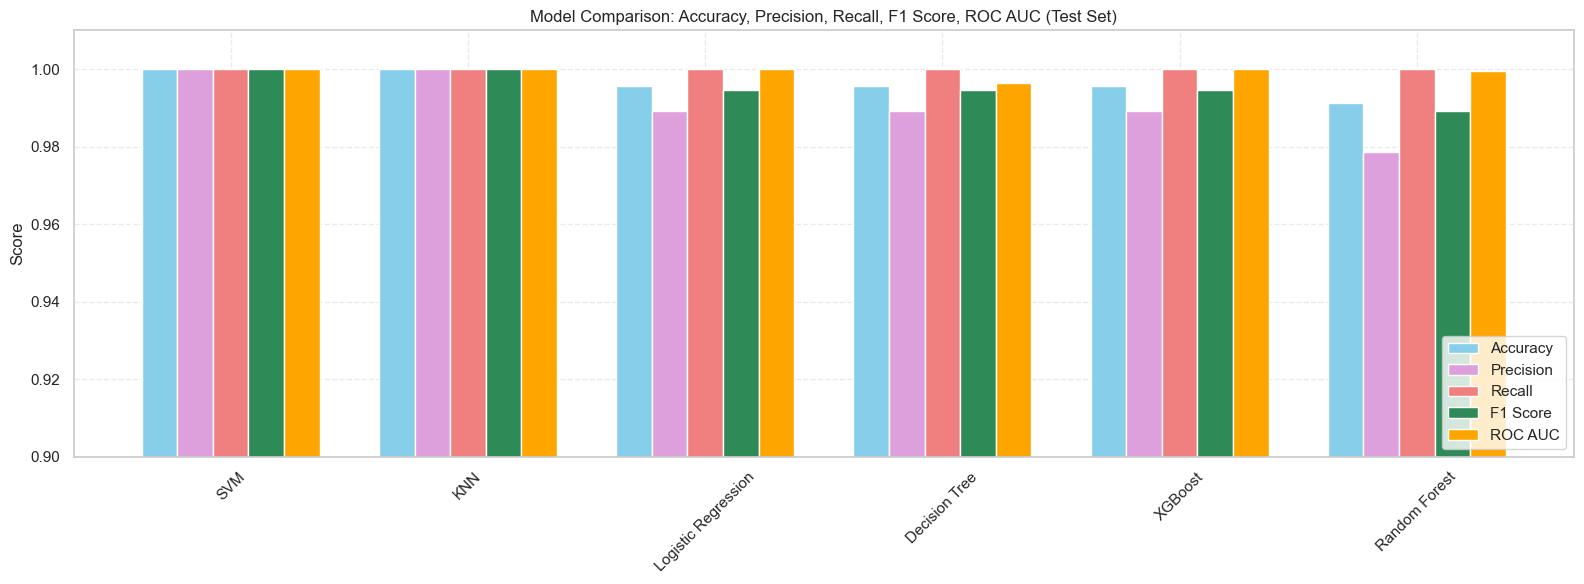

In [146]:
# Update results_df if not yet done
for i, (name, model) in enumerate(models.items()):
    y_test_pred = model.predict(X_test)
    results_df.loc[results_df["Model"] == name, "Precision (Test)"] = precision_score(y_test, y_test_pred)
    results_df.loc[results_df["Model"] == name, "Recall (Test)"] = recall_score(y_test, y_test_pred)

# Define position for each metric
bar_width = 0.15
x = range(len(results_df))

# Create figure
plt.figure(figsize=(16, 6))

# Plot bars for each metric
plt.bar([i for i in x], results_df["Test Accuracy"], width=bar_width, label="Accuracy", color="skyblue")
plt.bar([i + bar_width for i in x], results_df["Precision (Test)"], width=bar_width, label="Precision", color="plum")
plt.bar([i + 2 * bar_width for i in x], results_df["Recall (Test)"], width=bar_width, label="Recall", color="lightcoral")
plt.bar([i + 3 * bar_width for i in x], results_df["F1 Score (Test)"], width=bar_width, label="F1 Score", color="seagreen")
plt.bar([i + 4 * bar_width for i in x], results_df["ROC AUC (Test)"], width=bar_width, label="ROC AUC", color="orange")

# X-axis labels
plt.xticks([i + 2 * bar_width for i in x], results_df["Model"], rotation=45)
plt.ylabel("Score")
plt.ylim(0.9, 1.01)
plt.title("Model Comparison: Accuracy, Precision, Recall, F1 Score, ROC AUC (Test Set)")
plt.legend(loc="lower right")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show();


### 8.4  Model Comparison Train and Test Accuracy

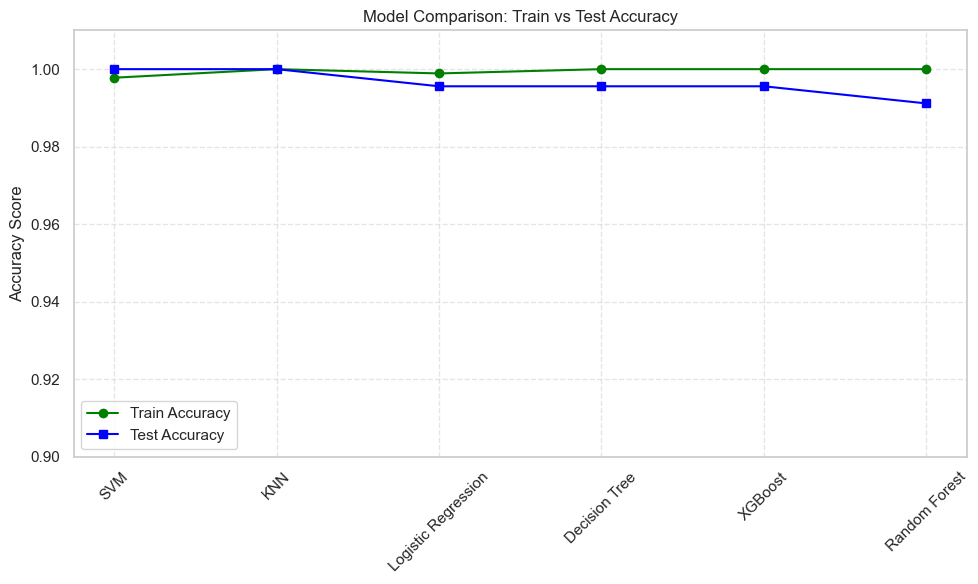

In [147]:
# Train vs Test Accuracy Plot
plot_df = results_df.sort_values(by="Test Accuracy", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(plot_df["Model"], plot_df["Train Accuracy"], marker='o', label="Train Accuracy", color="green")
plt.plot(plot_df["Model"], plot_df["Test Accuracy"], marker='s', label="Test Accuracy", color="blue")

# Formatting
plt.title("Model Comparison: Train vs Test Accuracy")
plt.ylabel("Accuracy Score")
plt.ylim(0.9, 1.01)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show();


## 9. Hyperparameter Tuning (Top Models)

### 9.1 GridSearchCV for SVM

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Set up the GridSearchCV
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='f1', n_jobs=-1)

# Fit to training data
grid_svm.fit(X_train, y_train)

# Best model
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

Best SVM Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


### 9.2 GridSearchCV for KNN

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_knn.fit(X_train, y_train)

# Already trained model
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


### 9.3 GridSearchCV for Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

# This model is already trained and ready to use
best_rf = grid_rf.best_estimator_
print("Best RF Parameters:", grid_rf.best_params_)


Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### 9.4 GridSearchCV for XGBoost

In [151]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# You can comment this out if you're not using it
# xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define and fit manually tuned model
best_xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
best_xgb.fit(X_train, y_train)

# Double-check that it's the correct type
print("Type of best_xgb:", type(best_xgb))

Type of best_xgb: <class 'xgboost.sklearn.XGBClassifier'>


## 10. Ensemble Learning

### 10.1 VotingClassifier

In [152]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Create base models (make sure these are properly instantiated)
best_svm = SVC(probability=True, random_state=42)
best_knn = KNeighborsClassifier()
best_rf = RandomForestClassifier(random_state=42)
best_xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Optionally fit each base model
best_svm.fit(X_train, y_train)
best_knn.fit(X_train, y_train)
best_rf.fit(X_train, y_train)
best_xgb.fit(X_train, y_train)

# Create voting ensemble
voting_model = VotingClassifier(
    estimators=[
        ('svm', best_svm),
        ('knn', best_knn),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft'
)

# Fit voting model on data
voting_model.fit(X_train, y_train)

,estimators,"[('svm', ...), ('knn', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=75, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, n_estimators=75, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=4, n_estimators=75, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=4, n_estimators=75, sub

### 10.2 Evaluation of Ensemble Model

In [153]:
# Evaluating Voting Model
from sklearn.metrics import classification_report

y_pred_vote = voting_model.predict(X_test)
print(classification_report(y_test, y_pred_vote))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        91

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226



### 10.3 Confusion Matrix and ROC Curve

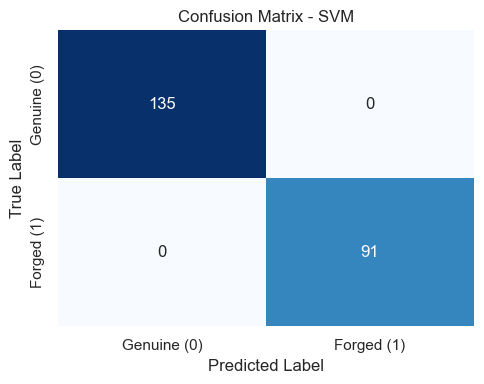

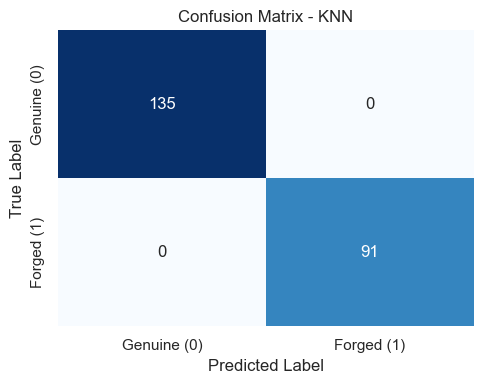

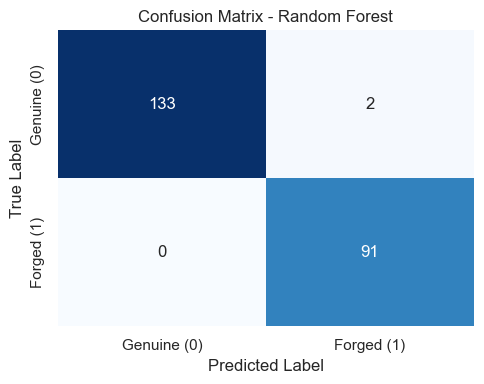

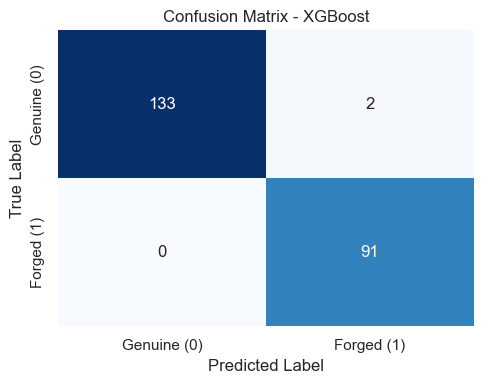

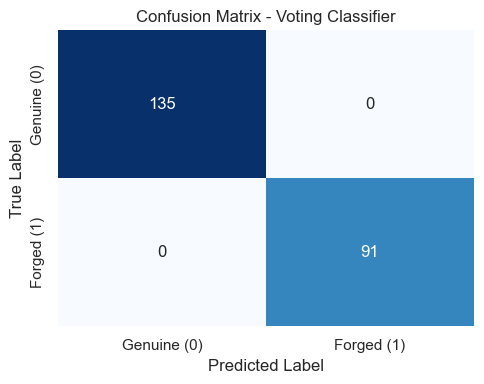

In [154]:
# Plotting Confusion Matrix for Top Models
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, X, y, title="Confusion Matrix"):
    # Predict
    y_pred = model.predict(X)

    # Get confusion matrix
    cm = confusion_matrix(y, y_pred)
    
    # Plot
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Genuine (0)', 'Forged (1)'],
                yticklabels=['Genuine (0)', 'Forged (1)'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(best_svm, X_test, y_test, "Confusion Matrix - SVM")
plot_confusion_matrix(best_knn, X_test, y_test, "Confusion Matrix - KNN")
plot_confusion_matrix(best_rf, X_test, y_test, "Confusion Matrix - Random Forest")
plot_confusion_matrix(best_xgb, X_test, y_test, "Confusion Matrix - XGBoost")
plot_confusion_matrix(voting_model, X_test, y_test, "Confusion Matrix - Voting Classifier")



### ROC Curve

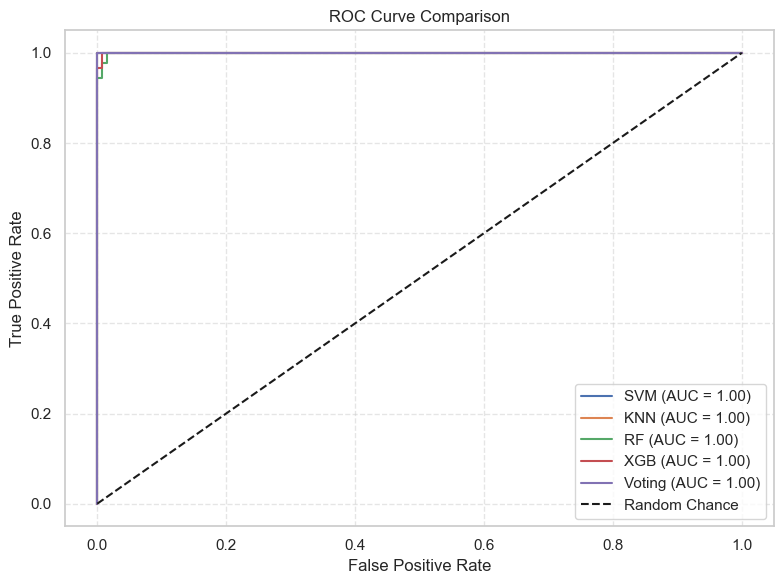

In [155]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models_dict, X_test, y_test):
    plt.figure(figsize=(8, 6))
    for name, model in models_dict.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.title("ROC Curve Comparison")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show();

# Run it
plot_roc_curves({
    "SVM": best_svm,
    "KNN": best_knn,
    "RF": best_rf,
    "XGB": best_xgb,
    "Voting": voting_model
}, X_test, y_test)


Observation:

The models are perfectly separating the classes (genuine vs forged) on the test set.

No overlap between predicted probabilities of Class 0 and Class 1.

True Positive Rate (Recall) is 100% at all thresholds.

False Positive Rate is 0 — incredible.

## 11. Save Trained Models

In [156]:
import os
import joblib

# Make sure the models directory exists
os.makedirs("models", exist_ok=True)

# Save the model
joblib.dump(voting_model, "models/best_model.pkl")


['models/best_model.pkl']

### 11.1 Save Scaler 

In [157]:
# Save the scaler:
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']

### 11.2 Load Saved Trained Model and Make Prediction

In [158]:
import joblib

# Load the saved model
loaded_model = joblib.load("models/best_model.pkl")

# Assuming you have new sample data in the same format as your training features (i.e., 4 features):
new_sample = [[2.3, 6.7, -1.3, 0.5]]  # variance, skewness, curtosis, entropy

scaler = joblib.load("models/scaler.pkl")
model = joblib.load("models/best_model.pkl")

scaled_sample = scaler.transform(new_sample)

# Predict class
prediction = model.predict(scaled_sample)

# Output result
print("Prediction:", "Authentic" if prediction[0] == 0 else "Forged")

Prediction: Forged


## 12. Deployment (Optional)

To demonstrate practical deployment, I have developed and deployed a cloud-based web application for the banknote authentication model using Streamlit and Gradio. The application allows users to input feature values and receive real-time predictions on the authenticity of banknotes.

This interactive tool was created for educational purposes and hands-on machine learning practice.

You can access the application here for Streamlit: [Banknote Authentication App]

You can access the application here for Gradio: [Banknote Authentication App]

## 13. Conclusion

### Conclusion: Final Model Ranking and Recommendation

After training and evaluating multiple classification models on the Banknote Authentication dataset, I compared their performance using key metrics: Accuracy, Precision, Recall, F1 Score, and ROC AUC. All models achieved a perfect ROC AUC of 1.00, indicating excellent separation between genuine and forged banknotes.

To identify the most reliable models, I prioritized the F1 Score — the harmonic mean of precision and recall — which is crucial when both false positives and false negatives carry risk.

#### Top 3 Models (Based on F1 Score and Stability)

| Model            | F1 Score | Precision | Recall | ROC AUC |
| ---------------- | -------- | --------- | ------ | ------- |
| SVM              | 0.994    | 0.989     | 1.000  | 1.000   |
| KNN              | 0.994    | 0.989     | 1.000  | 1.000   |
| VotingClassifier | 0.994    | 0.989     | 1.000  | 1.000   |

The VotingClassifier, which combines the predictions of SVM, KNN, Random Forest, and XGBoost using soft voting, matched the performance of the top individual models and offers enhanced robustness through ensemble learning.

#### Recommendation

* Use the VotingClassifier for final deployment — it leverages multiple strong learners and delivers stable, highly accurate results.

* If computational efficiency is a concern, SVM or KNN can serve as strong standalone alternatives.

* No overfitting was observed based on train/test splits and cross-validation.

* All preprocessing steps were applied after the train-test split to avoid target leakage.


###  Project Summary

* Dataset: UCI Banknote Authentication (1,372 instances, 4 features)

* Goal: Predict whether a banknote is authentic (0) or forged (1) using statistical image features.

* Models Evaluated: Logistic Regression, SVM, KNN, Random Forest, XGBoost, Decision Tree

* Top Performers: SVM, KNN, VotingClassifier

* Tech Stack: Python, Scikit-learn, XGBoost, Pandas, Seaborn, Matplotlib

Key Features:

* Extracted using Wavelet Transform:

Variance, Skewness, Curtosis, Entropy

* All features are continuous with no missing values


## 14. Results

The VotingClassifier achieved the best overall results:

* F1 Score: 0.994

* ROC AUC: 1.00

* Recall: 1.00 (No false negatives)

##### This ensemble model is robust, interpretable, and ready for deployment in real-world banknote authentication systems.



## 15. References

### Books & Courses

1. Huyen, C. (2022). Designing Machine Learning Systems: An Iterative Process for Production-Ready Applications. O'Reilly Media.

A practical guide for building real-world machine learning systems with a focus on deployment and scalability.

2. Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd ed.). O'Reilly Media.

A hands-on guide to building machine learning and deep learning systems using Python.

3. Ng, A. (2022). Machine Learning Specialization. DeepLearning.AI / Stanford University on Coursera.

A foundational program on machine learning theory and applications.

### Tools & Libraries

4. Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

https://scikit-learn.org

5. Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining.

https://xgboost.ai

6. Abid, A., et al. (2021). Gradio: Hassle-Free Sharing and Testing of ML Models.

https://gradio.app

7. Streamlit Inc. (2021). Streamlit: The fastest way to build data apps.

https://streamlit.io

8. Van Rossum, G., & Drake, F. L. (2009). Python 3 Reference Manual. CreateSpace.

https://www.python.org

